## Forest Fire Dynamics in Alberta

## DATA 601 L01-1 Final Report
Group 1: Steen Rasmussen, Kennedy Gunderson, Bobbi Boyce, Rodney Sibanda

## Introduction

The goal of this project was to explore the many different characteristics of Alberta wildfires from 2006-2023. By conducting this analysis, we hoped to gain insights into how emergency responses, surveillance, and monitoring might be improved to reduce the severity and abundance of forest fires. This is an especially pressing matter, as climate change and human activity worsen environmental conditions, leading to more catastrophic events. Forest fires threaten precious ecosystems, displace families, worsen respiratory conditions, and increase mental health challenges. 

We set out with four main guiding questions we wished to explore to create an analysis that was comprehensive, but also within the scope of the class. 
These include:

1.	How does fuel type (i.e., vegetation cover of the fire) affect the size and spread of fires? Is there any difference in the distance from water sources between fuel types that may result in worsened fires?
2.	How have weather conditions affected the size and frequency of wildfires in Alberta?
3.	Has the annual number of forest fires increased between 2006 to 2023? Have the fires become larger or more severe over time?
4.	What are the five leading causes of forest fires in Alberta? Are more fires caused by nature or by human error?

As we go through our analysis, it is clear how our guiding questions have evolved. This evolution mainly pertained to how we displayed our data to create meaningful visuals, as our learning and feedback progressed. As we gained the skills to manage data cleaning issues such as recategorizing or merging columns, and deciding what to do with null values, our interpretations became more concise and meaningful. 

We believe this project is significant because as we understand the factors that contribute to the formation of wildfires, we can glean insights into how fires have behaved in the past, find common patterns and mitigate their effects to better protect the environment and public health in the future. 

## Our Dataset

This dataset relates to Alberta wildfires from 2006-2023. The data is free to use under the Alberta Open Government License, which states that all data published by the Alberta Government is free to 'Copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose'(Open Government, n.d). The Excel file contains 50 columns and 25,322 rows of data and is missing entries for many categories such as fire name, industry identifier, responsible group, and more. This is due to irregular reporting, as stated under the description on the website for this data set. Some challenges the data set produced were whether or not we should drop the null values, impute them, or merge columns. This was specifically an issue in our analysis of the causes of fires. In the end, the decision on how to handle data cleaning differs depending on the guiding question and the columns being analyzed. The columns that were most crucial for our analysis included: fire year, current size, wind speed, fire type, weather conditions over fire, temperature, humidity, spread rate, and more. 

## Guiding Question 1: Fuel Type (Kennedy)

The guiding questions for this project section were:

1. Is there a fuel type associated with a higher spread rate?   
2. Do any fuel types have a greater distance from water?    
3. Do any fuel types produce larger fire sizes?   

Additionally, as I continued working on this project I came up with some additional goals to gain further insights into Alberta wildfires. I set out to create a heat map for the location of each fire from 2006-2023, grouped by fuel type, in the hopes that this may produce a geographic map where monitoring should be increased. As a final addition (and after receiving feedback), I looked into how many times a fire for each fuel type occurred.

##  Analysis: Fuel Type (Kennedy)

The analysis for this portion of the project included making heat maps, box plots, and bar graphs. To do this, I started by importing all necessary libraries, reviewing the dataset, and learning about what data types were present for each column.

In [6]:
#importing necessary libraries
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium 
from folium.plugins import HeatMap
from matplotlib.lines import Line2D

In [7]:
#Reading in data
data = pd.read_excel("/Users/kennedygunderson/Desktop/fp-historical-wildfire-data-2006-2023 (1).xlsx")
data_df = pd.DataFrame(data)

In [8]:
#Viewing head of the dataset to better understand columns and rows
data_df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2006,PWF001,NaN,0.10,A,56.249956,-117.181960,Private Land,Resident,NaN,...,NaN,NaN,2006-04-02 22:00:00,0.01,2006-04-02 22:00:00,0.01,NaN,NaN,2006-04-03 10:20:00,0.10
1,2006,EWF002,NaN,0.20,B,53.606367,-115.915733,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:20:00,0.20,2006-04-03 13:20:00,0.20,NaN,NaN,2006-04-03 14:00:00,0.20
2,2006,EWF001,NaN,0.50,B,53.610933,-115.594267,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:23:00,0.50,2006-04-03 13:23:00,0.50,NaN,NaN,2006-04-03 15:00:00,0.50
3,2006,EWF003,NaN,0.01,A,53.608867,-115.609467,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 14:08:00,0.01,2006-04-03 14:08:00,0.01,NaN,NaN,2006-04-03 15:05:00,0.01
4,2006,PWF002,NaN,0.10,A,56.249956,-117.050249,Provincial Land,Other Industry,Waste Disposal,...,NaN,NaN,2006-04-03 19:57:00,0.10,2006-04-03 20:19:00,0.10,2006-04-03 20:20:00,0.1,2006-04-05 10:18:00,0.10


In [9]:
#Seeing how many missing values exist for each column, the data types
#and how many rows and columns are present 

data_df.isna().sum()
#data_df.info()
#data_df.shape

fire_year                           0
fire_number                         0
fire_name                       24592
current_size                        0
size_class                          0
fire_location_latitude              0
fire_location_longitude             0
fire_origin                        16
general_cause_desc                  0
industry_identifier_desc        24859
responsible_group_desc          15938
activity_class                   9773
true_cause                      11770
fire_start_date                   678
det_agent_type                      0
det_agent                           0
discovered_date                  4941
discovered_size                 25175
reported_date                       0
dispatched_resource                17
dispatch_date                      17
start_for_fire_date                20
assessment_resource                 0
assessment_datetime                 0
assessment_hectares                 0
fire_spread_rate                 2752
fire_type   

After this, I made a new data frame with just the columns relevant to my analysis. These columns included: fuel type, current size, distance from water sources, fire spread rate, longitude, and latitude.  I chose to use the 'current size' column as a measure of the size of the fire because it had no empty values. Making this more concise data frame helped to bring down the memory usage for the data I wanted to work with, and made my work more efficient.

In [11]:
#grouping columns for fuel type and viewing the head of the data
fuel_data = data_df[["fuel_type","current_size","fire_spread_rate", "fire_location_latitude","fire_location_longitude","distance_from_water_source"]]
fuel_data.head()

,fuel_type,current_size,fire_spread_rate,fire_location_latitude,fire_location_longitude,distance_from_water_source
0,O1a,0.10,0.0,56.249956,-117.181960,NaN
1,O1a,0.20,0.0,53.606367,-115.915733,NaN
2,O1a,0.50,0.0,53.610933,-115.594267,NaN
3,O1b,0.01,0.0,53.608867,-115.609467,NaN
4,NaN,0.10,0.1,56.249956,-117.050249,NaN


After creating my new data frame, I began an analysis to look for null and empty values. What I found was that fuel type had 7,353 missing values and distance from water had 18,228 missing values. I decided to drop the columns with missing values for this analysis. This meant that it was easier to produce graphs and to make sure every row had a value for every column. I decided not to impute values in this case, as I was unsure how it would skew the data, and the dataset is large enough that there is still enough data to analyze. 

In [13]:
#viewing how many values are in each column
fuel_data.isnull().sum()

fuel_type                      7353
current_size                      0
fire_spread_rate               2752
fire_location_latitude            0
fire_location_longitude           0
distance_from_water_source    18228
dtype: int64

In [14]:
#Dropping empty values
cleaned_fuel = fuel_data.dropna()

## Is there a fuel type associated with more fires? 

Following this, I started by looking at how many times each fuel type had a fire occurrence. I produced two data frames: amount_df which contains just the count and fuel type for the cleaned data set, and amount_df_full, which contains the count and fuel type for the data before dropping null values. I decided to make both of these because I wanted to get an accurate count of the number of fires that have occurred in the period between 2006-2023. However, when comparing these graphs to other visuals produced in this analysis, it would be more relevant to make comparisons to the cleaned data set for fire counts. 

In [16]:
#resetting the index for the cleaned index
to_count = cleaned_fuel.reset_index()

#counting the number of times each fuel type occurs for cleaned data
amount = to_count['fuel_type'].value_counts()
#turning this into a dataframe 
amount_df = pd.DataFrame(amount)
#resetting the index
amount_df = amount_df.reset_index()


#counting the number of times each fuel type occurs for raw dataset
full_amount = fuel_data['fuel_type'].value_counts()
#turning this into a dataframe
amount_df_full = pd.DataFrame(full_amount)
#resetting the index
amount_df_full = amount_df_full.reset_index()


Using the amount data frames, I produced two graphs as seen below. I chose a bar plot in this case to display the number of fires for each fuel type as it is the most intuitive for this type of data.

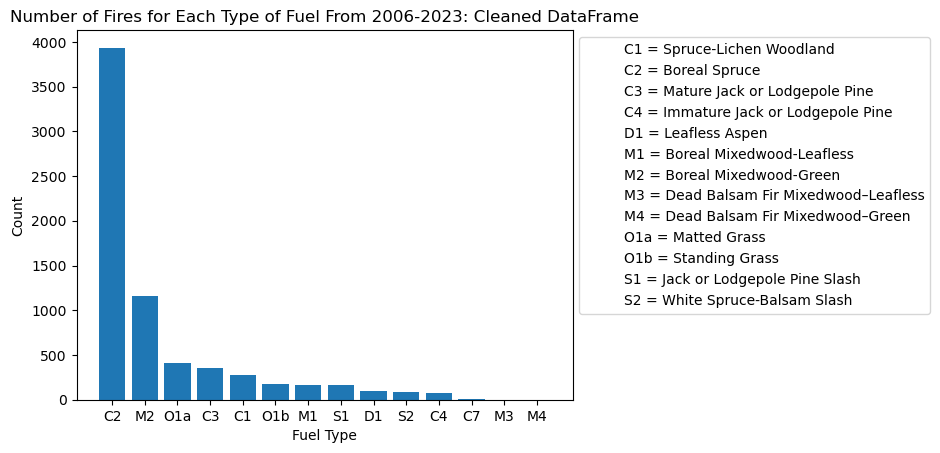

In [18]:
#plotting fuel type against count
plt.bar(amount_df['fuel_type'],amount_df['count'])

#changing the y and x axis, and adding the legend
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Number of Fires for Each Type of Fuel From 2006-2023: Cleaned DataFrame')

empty_handle = Line2D([0], [0], color='white', lw=0)
fuel_type_legend = ['C1 = Spruce-Lichen Woodland', 'C2 = Boreal Spruce', 'C3 = Mature Jack or Lodgepole Pine',
                    'C4 = Immature Jack or Lodgepole Pine', 'D1 = Leafless Aspen', 'M1 = Boreal Mixedwood-Leafless',
                    'M2 = Boreal Mixedwood-Green', 'M3 = Dead Balsam Fir Mixedwood–Leafless',
                    'M4 = Dead Balsam Fir Mixedwood–Green', 'O1a = Matted Grass', 'O1b = Standing Grass',
                    'S1 = Jack or Lodgepole Pine Slash', 'S2 = White Spruce-Balsam Slash']
plt.legend([empty_handle, empty_handle, empty_handle, empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle],fuel_type_legend, loc='upper left', bbox_to_anchor=(1, 1))
#showing the graph 
plt.show()


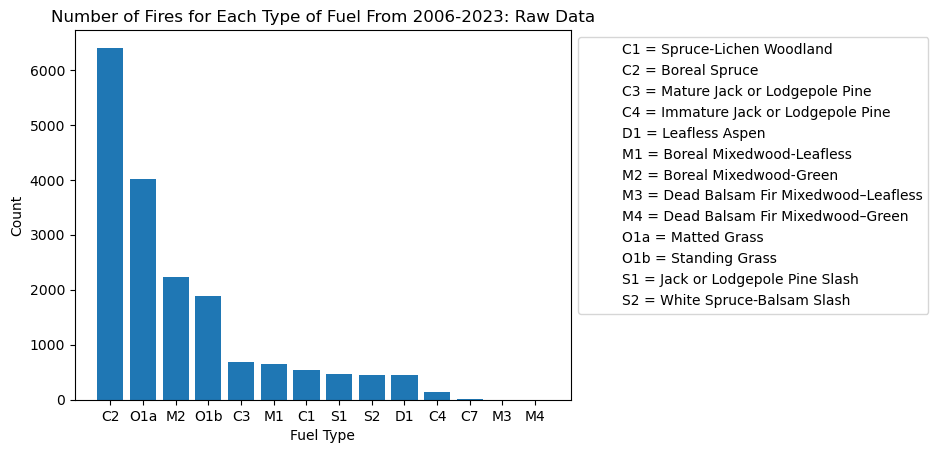

In [19]:
#plotting raw data against fuel type 
plt.bar(amount_df_full['fuel_type'],amount_df_full['count'])
#creating y and x axis labels, and adding a legend 
plt.xlabel('Fuel Type')

plt.ylabel('Count')

plt.title('Number of Fires for Each Type of Fuel From 2006-2023: Raw Data')


empty_handle = Line2D([0], [0], color='white', lw=0)
fuel_type_legend = ['C1 = Spruce-Lichen Woodland', 'C2 = Boreal Spruce', 'C3 = Mature Jack or Lodgepole Pine',
                    'C4 = Immature Jack or Lodgepole Pine', 'D1 = Leafless Aspen', 'M1 = Boreal Mixedwood-Leafless',
                    'M2 = Boreal Mixedwood-Green', 'M3 = Dead Balsam Fir Mixedwood–Leafless',
                    'M4 = Dead Balsam Fir Mixedwood–Green', 'O1a = Matted Grass', 'O1b = Standing Grass',
                    'S1 = Jack or Lodgepole Pine Slash', 'S2 = White Spruce-Balsam Slash']
plt.legend([empty_handle, empty_handle, empty_handle, empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle],fuel_type_legend, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

The two pieces of code below visualize the data frames used to produce the above graphs so it is easier to see the actual values for each fuel type. 

In [21]:
#visualizing the raw dataset counts
amount_df_full

,fuel_type,count
0,C2,6402
1,O1a,4023
2,M2,2232
3,O1b,1888
4,C3,684
5,M1,657
6,C1,549
7,S1,471
8,S2,452
9,D1,446


In [22]:
#visualizing the cleaned dataset counts
amount_df

,fuel_type,count
0,C2,3934
1,M2,1156
2,O1a,409
3,C3,352
4,C1,280
5,O1b,175
6,M1,164
7,S1,159
8,D1,97
9,S2,87


In [23]:
#sorting the fuel type
cleaned_fuel = cleaned_fuel.sort_values(by = "fuel_type" )
#resetting the index
cleaned_fuel.reset_index()
#setting the index as the fuel type
fuel_index = cleaned_fuel.set_index('fuel_type')

The next chunks of code allowed for the production of three box plots: current size of fire, distance from water sources, and fire spread rate for each fuel type. As of right now, the code has the y-axis adjusted to show the distribution of boxes, however, in presentations, I adjusted the box plots to three different magnifications to show the full distribution. After receiving feedback on the video presentation, I added a legend to add more significance and meaning to the fuel types.

## Are there fuel types that produce larger fire sizes?

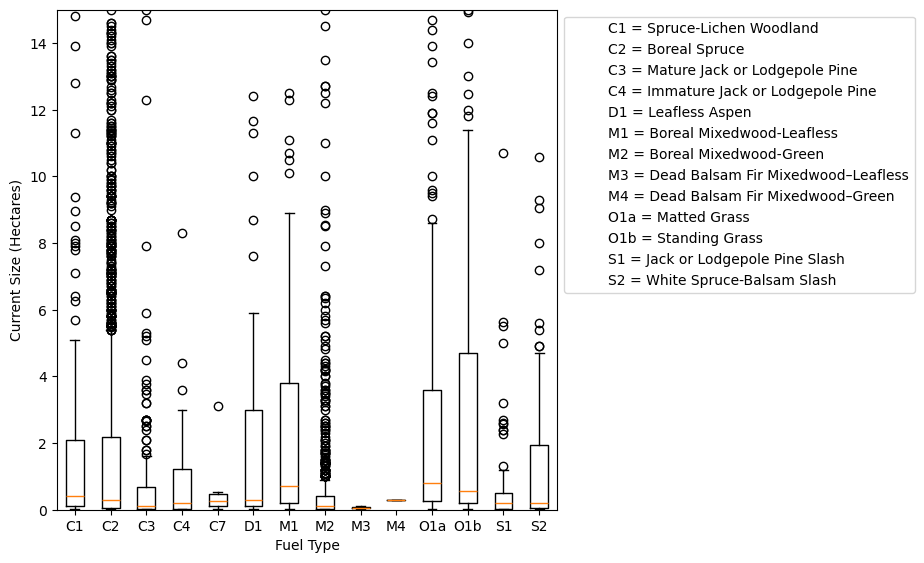

In [26]:
#Going through the data set and finding the values for each fuel type

C1 = fuel_index.loc['C1']
C1_plot = C1['current_size']

C2 = fuel_index.loc['C2']
C2_plot = C2['current_size']


C3 = fuel_index.loc['C3']
C3_plot = C3['current_size']


C4 = fuel_index.loc['C4']
C4_plot = C4['current_size']


C7 = fuel_index.loc['C7']
C7_plot = C7['current_size']

D1 = fuel_index.loc['D1']
D1_plot = D1['current_size']


M1 = fuel_index.loc['M1']
M1_plot = M1['current_size']

M2 = fuel_index.loc['M2']
M2_plot = M2['current_size']

M3 = fuel_index.loc['M3']
M3_plot = M3['current_size']

M4 = fuel_index.loc['M4']
M4_plot = M4['current_size']

Oa = fuel_index.loc['O1a']
Oa_plot = Oa['current_size']

Ob = fuel_index.loc['O1b']
Ob_plot = Ob['current_size']

S1 = fuel_index.loc['S1']
S1_plot = S1['current_size']

S2 = fuel_index.loc['S2']
S2_plot = S2['current_size']

#adding all od the data into list

data = [C1_plot, C2_plot, C3_plot, 
        C4_plot, C7_plot, D1_plot, M1_plot, M2_plot, 
        M3_plot, M4_plot, Oa_plot, Ob_plot, S1_plot, 
        S2_plot]


#setting the figure size, adding axes, and adding the labels 
fig = plt.figure(figsize =(5, 5))


ax = fig.add_axes([0, 0, 1, 1])


bp = ax.boxplot(data)

fuel_type_labels = ['C1', 'C2', 'C3', 
                    'C4', 'C7', 'D1', 
                    'M1', 'M2', 'M3', 
                    'M4', 'O1a', 'O1b', 
                    'S1', 'S2']


#adding the positions for each box, as well as the labels 
ax.set_xticks(range(1, len(fuel_type_labels) + 1)) 
ax.set_xticklabels(fuel_type_labels)  


#setting the x and y axis, as well as creating the legend
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Current Size (Hectares)')
plt.ylim(0, 15)
empty_handle = Line2D([0], [0], color='white', lw=0)
fuel_type_legend = ['C1 = Spruce-Lichen Woodland', 'C2 = Boreal Spruce', 'C3 = Mature Jack or Lodgepole Pine',
                    'C4 = Immature Jack or Lodgepole Pine', 'D1 = Leafless Aspen', 'M1 = Boreal Mixedwood-Leafless',
                    'M2 = Boreal Mixedwood-Green', 'M3 = Dead Balsam Fir Mixedwood–Leafless',
                    'M4 = Dead Balsam Fir Mixedwood–Green', 'O1a = Matted Grass', 'O1b = Standing Grass',
                    'S1 = Jack or Lodgepole Pine Slash', 'S2 = White Spruce-Balsam Slash']
plt.legend([empty_handle, empty_handle, empty_handle, empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle],fuel_type_legend, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Do any fuel types have a greater distance from water?

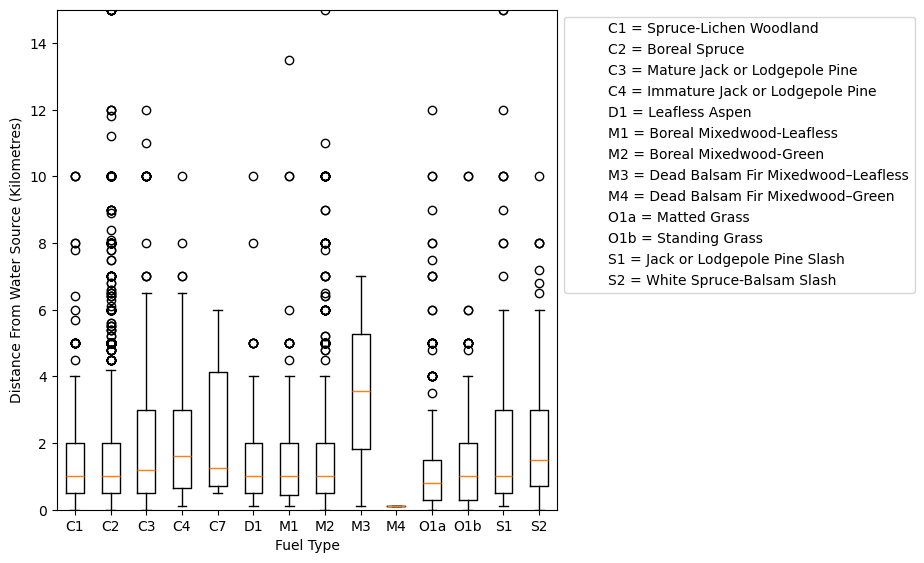

In [28]:
#for comments, please refer to current size plot
C1d = fuel_index.loc['C1']
C1_plotd = C1['distance_from_water_source']

C2d = fuel_index.loc['C2']
C2_plotd = C2['distance_from_water_source']


C3d = fuel_index.loc['C3']
C3_plotd = C3['distance_from_water_source']


C4d = fuel_index.loc['C4']
C4_plotd = C4['distance_from_water_source']


C7d = fuel_index.loc['C7']
C7_plotd = C7['distance_from_water_source']

D1d = fuel_index.loc['D1']
D1_plotd = D1['distance_from_water_source']


M1d = fuel_index.loc['M1']
M1_plotd = M1['distance_from_water_source']

M2d = fuel_index.loc['M2']
M2_plotd = M2['distance_from_water_source']

M3d = fuel_index.loc['M3']
M3_plotd = M3['distance_from_water_source']

M4d = fuel_index.loc['M4']
M4_plotd = M4['distance_from_water_source']

Oad = fuel_index.loc['O1a']
Oa_plotd = Oa['distance_from_water_source']

Obd = fuel_index.loc['O1b']
Ob_plotd = Ob['distance_from_water_source']

S1d = fuel_index.loc['S1']
S1_plotd = S1['distance_from_water_source']

S2d = fuel_index.loc['S2']
S2_plotd = S2['distance_from_water_source']

datad = [C1_plotd, C2_plotd, C3_plotd, 
         C4_plotd, C7_plotd, D1_plotd, 
         M1_plotd, M2_plotd, M3_plotd,
         M4_plotd, Oa_plotd, Ob_plotd, 
         S1_plotd, S2_plotd]

fig = plt.figure(figsize =(5, 5))


ax1 = fig.add_axes([0, 0, 1, 1])


bpd = ax1.boxplot(datad)


fuel_type_labels = ['C1', 'C2', 'C3', 
                    'C4', 'C7', 'D1', 
                    'M1', 'M2', 'M3', 
                    'M4', 'O1a', 'O1b', 
                    'S1', 'S2']


ax1.set_xticks(range(1, len(fuel_type_labels) + 1)) 
ax1.set_xticklabels(fuel_type_labels)  


ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Distance From Water Source (Kilometres)')
plt.ylim(0, 15)
# show plot

empty_handle = Line2D([0], [0], color='white', lw=0)
fuel_type_legend = ['C1 = Spruce-Lichen Woodland', 'C2 = Boreal Spruce', 'C3 = Mature Jack or Lodgepole Pine',
                    'C4 = Immature Jack or Lodgepole Pine', 'D1 = Leafless Aspen', 'M1 = Boreal Mixedwood-Leafless',
                    'M2 = Boreal Mixedwood-Green', 'M3 = Dead Balsam Fir Mixedwood–Leafless',
                    'M4 = Dead Balsam Fir Mixedwood–Green', 'O1a = Matted Grass', 'O1b = Standing Grass',
                    'S1 = Jack or Lodgepole Pine Slash', 'S2 = White Spruce-Balsam Slash']
plt.legend([empty_handle, empty_handle, empty_handle, empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle],fuel_type_legend, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Is there a fuel type associated with a higher spread rate?

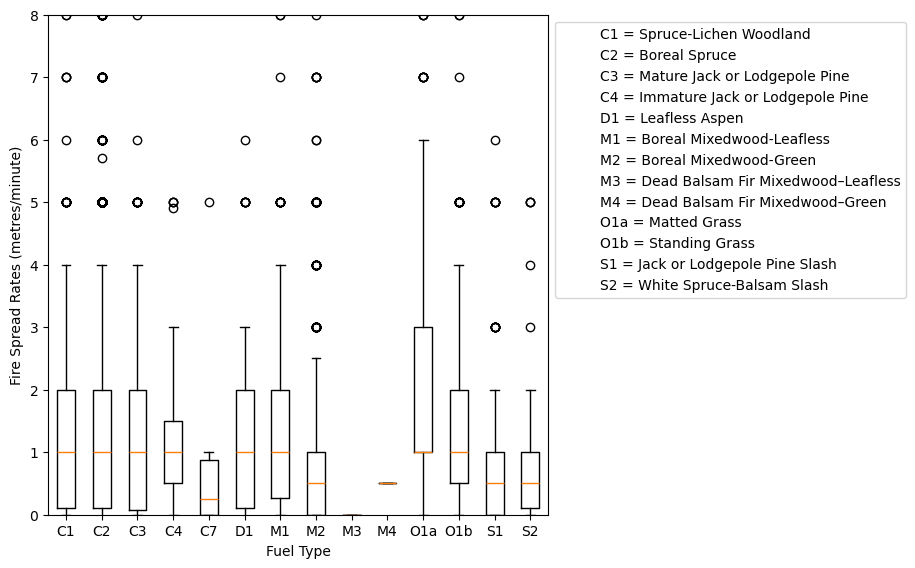

In [30]:
#for comments, please refer to current size plot
C1f = fuel_index.loc['C1']
C1_plotf = C1f['fire_spread_rate']

C2f = fuel_index.loc['C2']
C2_plotf = C2f['fire_spread_rate']


C3f = fuel_index.loc['C3']
C3_plotf = C3f['fire_spread_rate']


C4f = fuel_index.loc['C4']
C4_plotf = C4f['fire_spread_rate']


C7f = fuel_index.loc['C7']
C7_plotf = C7f['fire_spread_rate']

D1f = fuel_index.loc['D1']
D1_plotf = D1f['fire_spread_rate']


M1f = fuel_index.loc['M1']
M1_plotf = M1f['fire_spread_rate']

M2f = fuel_index.loc['M2']
M2_plotf = M2f['fire_spread_rate']

M3f = fuel_index.loc['M3']
M3_plotf = M3f['fire_spread_rate']

M4f = fuel_index.loc['M4']
M4_plotf = M4f['fire_spread_rate']

Oaf = fuel_index.loc['O1a']
Oa_plotf = Oaf['fire_spread_rate']

Obf = fuel_index.loc['O1b']
Ob_plotf = Obf['fire_spread_rate']

S1f = fuel_index.loc['S1']
S1_plotf = S1f['fire_spread_rate']

S2f = fuel_index.loc['S2']
S2_plotf = S2f['fire_spread_rate']

dataf = [C1_plotf, C2_plotf, C3_plotf, 
         C4_plotf, C7_plotf, D1_plotf, 
         M1_plotf, M2_plotf, M3_plotf, 
         M4_plotf, Oa_plotf, Ob_plotf, 
         S1_plotf, S2_plotf]

fig = plt.figure(figsize =(5, 5))


axf = fig.add_axes([0, 0, 1, 1])


bpf = axf.boxplot(dataf)

fuel_type_labels = ['C1', 'C2', 'C3', 
                    'C4', 'C7', 'D1', 
                    'M1', 'M2', 'M3', 
                    'M4', 'O1a', 'O1b',
                    'S1', 'S2']


axf.set_xticks(range(1, len(fuel_type_labels) + 1)) 
axf.set_xticklabels(fuel_type_labels) 


axf.set_xlabel('Fuel Type')
axf.set_ylabel('Fire Spread Rates (metres/minute)')
plt.ylim(0, 8)

empty_handle = Line2D([0], [0], color='white', lw=0)
fuel_type_legend = ['C1 = Spruce-Lichen Woodland', 'C2 = Boreal Spruce', 'C3 = Mature Jack or Lodgepole Pine',
                    'C4 = Immature Jack or Lodgepole Pine', 'D1 = Leafless Aspen', 'M1 = Boreal Mixedwood-Leafless',
                    'M2 = Boreal Mixedwood-Green', 'M3 = Dead Balsam Fir Mixedwood–Leafless',
                    'M4 = Dead Balsam Fir Mixedwood–Green', 'O1a = Matted Grass', 'O1b = Standing Grass',
                    'S1 = Jack or Lodgepole Pine Slash', 'S2 = White Spruce-Balsam Slash']
plt.legend([empty_handle, empty_handle, empty_handle, empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle,empty_handle,empty_handle,empty_handle,
            empty_handle],fuel_type_legend, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

After producing the boxplots, I began to make the heatmap using the folium library. I was able to do this by creating 14 distinct heat maps for each fuel type, and subsequently layering them onto each other. I had to use the iloc function for each fuel type and manually scan through an Excel sheet with the cleaned data to determine the indices that each fuel type stopped and ended. This allowed me to gather the latitude and longitude at that location, and add it to the map layer for each fuel type.

In [32]:
#setting index to fuel type
heat_map_fuel = cleaned_fuel.set_index(["fuel_type"])

#creating latitude and longitude pairs from the data
lat_long_cols = (list(zip(heat_map_fuel['fire_location_latitude'], heat_map_fuel['fire_location_longitude'])))

#resorting the fuel type column 
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

#creating the map we want to overlay our points on 
map_all = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)

#locating the data to use
c1_fuel = heat_map_fuel.iloc[0:281,2:4]
#grabbing the latitude and longitude at these points
c1_fuel_plot = (list(zip(c1_fuel['fire_location_latitude'], c1_fuel['fire_location_longitude']))) 

#adding this to the map
c1_layer = folium.FeatureGroup(name = "C1 Fuel Type")
HeatMap(c1_fuel_plot).add_to(c1_layer)
c1_layer.add_to(map_all)

## Heat Map 

In [34]:
#for all following code, please refer to first heatmap layer for comments on process
map2 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

c2_fuel = heat_map_fuel.iloc[282:4216,2:4]
c2_fuel_plot = (list(zip(c2_fuel['fire_location_latitude'], c2_fuel['fire_location_longitude']))) 
c2_layer = folium.FeatureGroup(name = "C2 Fuel Type")
HeatMap(c2_fuel_plot).add_to(c2_layer)
c2_layer.add_to(map_all)

In [35]:
map3 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

c3_fuel = heat_map_fuel.iloc[4216:4567,2:4]
c3_fuel_plot = (list(zip(c3_fuel['fire_location_latitude'], c3_fuel['fire_location_longitude']))) 
c3_layer = folium.FeatureGroup(name = "C3 Fuel Type")
HeatMap(c3_fuel_plot).add_to(c3_layer)
c3_layer.add_to(map_all)

In [36]:
map4 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

c4_fuel = heat_map_fuel.iloc[4568:4643,2:4]
c4_fuel_plot = (list(zip(c4_fuel['fire_location_latitude'], c4_fuel['fire_location_longitude']))) 
c4_layer = folium.FeatureGroup(name = "C4 Fuel Type")
HeatMap(c4_fuel_plot).add_to(c4_layer)
c4_layer.add_to(map_all)

In [37]:
map5 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

c7_fuel = heat_map_fuel.iloc[4643:4649,2:4]
c7_fuel_plot = (list(zip(c7_fuel['fire_location_latitude'], c7_fuel['fire_location_longitude']))) 
c7_layer = folium.FeatureGroup(name = "C7 Fuel Type")
HeatMap(c7_fuel_plot).add_to(c7_layer)
c7_layer.add_to(map_all)

In [38]:
map6 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

d1_fuel = heat_map_fuel.iloc[4649:4746,2:4]
d1_fuel_plot = (list(zip(d1_fuel['fire_location_latitude'], d1_fuel['fire_location_longitude']))) 
d1_layer = folium.FeatureGroup(name = "D1 Fuel Type")
HeatMap(d1_fuel_plot).add_to(d1_layer)
d1_layer.add_to(map_all)

In [39]:
map7 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

m1_fuel = heat_map_fuel.iloc[4746:4910,2:4]
m1_fuel_plot = (list(zip(d1_fuel['fire_location_latitude'], m1_fuel['fire_location_longitude']))) 
m1_layer = folium.FeatureGroup(name = "M1 Fuel Type")
HeatMap(m1_fuel_plot).add_to(m1_layer)
m1_layer.add_to(map_all)

In [40]:
map8 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

m2_fuel = heat_map_fuel.iloc[4910:6066,2:4]
m2_fuel_plot = (list(zip(d1_fuel['fire_location_latitude'], m2_fuel['fire_location_longitude']))) 
m2_layer = folium.FeatureGroup(name = "M2 Fuel Type")
HeatMap(m2_fuel_plot).add_to(m2_layer)
m2_layer.add_to(map_all)

In [41]:
map9 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

m3_fuel = heat_map_fuel.iloc[6066:6068,2:4]
m3_fuel_plot = (list(zip(d1_fuel['fire_location_latitude'], m3_fuel['fire_location_longitude']))) 
m3_layer = folium.FeatureGroup(name = "M3 Fuel Type")
HeatMap(m3_fuel_plot).add_to(m3_layer)
c1_layer.add_to(map_all)

In [42]:
map10 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

m4_fuel = heat_map_fuel.iloc[6068:6069,2:4]
m4_fuel_plot = (list(zip(d1_fuel['fire_location_latitude'], m4_fuel['fire_location_longitude']))) 
m4_layer = folium.FeatureGroup(name = "M4 Fuel Type")
HeatMap(m4_fuel_plot).add_to(m4_layer)
m4_layer.add_to(map_all)

In [43]:
map11 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

o1a_fuel = heat_map_fuel.iloc[6069:6478,2:4]
o1a_fuel_plot = (list(zip(o1a_fuel['fire_location_latitude'], o1a_fuel['fire_location_longitude']))) 
o1a_layer = folium.FeatureGroup(name = "O1a Fuel Type")
HeatMap(o1a_fuel_plot).add_to(o1a_layer)
o1a_layer.add_to(map_all)

In [44]:
map12 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

o1b_fuel = heat_map_fuel.iloc[6478:6653,2:4]
o1b_fuel_plot = (list(zip(o1b_fuel['fire_location_latitude'], o1b_fuel['fire_location_longitude']))) 
o1b_layer = folium.FeatureGroup(name = "O1b Fuel Type")
HeatMap(o1b_fuel_plot).add_to(o1b_layer)
o1b_layer.add_to(map_all)

In [45]:
map13 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

s1_fuel = heat_map_fuel.iloc[6653:6812,2:4]
s1_fuel_plot = (list(zip(s1_fuel['fire_location_latitude'], s1_fuel['fire_location_longitude']))) 
s1_layer = folium.FeatureGroup(name = "S1 Fuel Type")
HeatMap(s1_fuel_plot).add_to(s1_layer)
s1_layer.add_to(map_all)

In [46]:
map14 = folium.Map(location = [53.9333, -116.5765], zoom_start = 5)
heat_map_fuel = heat_map_fuel.sort_values(by = "fuel_type")

s2_fuel = heat_map_fuel.iloc[6812:6899,2:4]
s2_fuel_plot = (list(zip(o1b_fuel['fire_location_latitude'], s2_fuel['fire_location_longitude']))) 
s2_layer = folium.FeatureGroup(name = "S2 Fuel Type")
HeatMap(s2_fuel_plot).add_to(s2_layer)
s2_layer.add_to(map_all)

In [47]:
#adding all of the maps together 
folium.LayerControl().add_to(map_all)
map_all

The resulting heatmap is an interactive method to view where each fire occurred in Alberta from 2006-2023. Zooming in shows more precise locations for each fire, as each data point represents a single fire from the data set. This allows for inferences about which areas need an increase in monitoring, and some information on which fuel type is present in each region (at least where fires have occurred). What we also gain from this heat map is the approximate region that each fuel type resides in, as well as where fuel types overlap.

### Discussion: Fuel Type (Kennedy)

The final results from this analysis were not aligned with what I expected to find from this dataset. I was expecting there would be a specific fuel type with an obvious difference in either its distance from water, spread rate, or size, which would suggest it produces more severe fires. Surprisingly, I discovered that the medians of each fuel type for each variable analyzed in the guiding questions were remarkably similar. When looking at the box plot for the current size of fires, the median appears to be higher for the M1 and O1b fuel types. These two fuel types correspond to Boreal Mixedwood Leafless trees, and Standing grass, respectively. This is an interesting observation, because these fires have occurred much less frequently than others such as C2, with a count of 165 for M1, and 175 for O1b. This may mean that although they are less common, they are more likely to have a consistently higher median area burned than other fires. When we shift our focus to outliers for this boxplot however, it is clear that C2 fires (boreal spruce), not only have the highest potential for larger fires, but there have also been the greatest number of fires in Alberta burned with this fuel type, with 3,934 fires between 2006-2023. When comparing this to the heat map, it is clear that the majority of the fires in Alberta, and the largest fires have been due to the burning of boreal spruce.

This leads to the next boxplot I'd like to discuss, which is the spread rate. This boxplot again produced very consistent medians across the board, with most of the distributions being left-skewed. From these graphs, I believe it is most impactful to look at the outliers. The large number of outliers for C1, C2, and M2 may mean another factor such as temperature, wind, or ability to extinguish the fire by emergency services is causing a large amount of variability in these distributions.

The final boxplot produced for this project was each fuel type's distance from water. In terms of median values, it is clear that the M3 fuel type is the furthest away from water sources. When looking at the outliers, however, C2 carries the most variability in distance from water. This may be because of the diverse range of conditions and water availabilities that boreal forests can grow in, as well as the large land coverage of C2 fuel types prominently visualized in the heat map. 

Getting the feedback in the video presentation was incredibly important for seeing this project from an outside perspective. Although there are time constraints, and I am not able to incorporate all feedback, it allowed me to implement some changes. First, I added a legend to all graphs that mention fuel type to increase meaning. Although it was suggested that I explore possible alternatives to boxplots, I feel this leaves out important information in terms of the unexplained variation in fuel types, that may have to do with weather conditions, the environments that each vegetation grows in, etc. Other suggestions included looking into underground fires and grouping fuel types by region. These both may be outside of the scope of what we can complete in this project. This did however prompt me to add the bar plots with the count of each fuel type. I feel that this helps to put the outliers into more perspective, based on the number of data points for each fuel type.

The major contributions for this part of the project included making boxplots, a heat map, and count graphs for each fuel type. Additionally, this included cleaning the data set, making a new data frame for the columns for the fuel type analysis, and interpreting each graph to gain more meaningful insights. 

One of the next things I would like to explore with this data set is how the time of firefighting differs based on factors such as land slope, type of fuel, etc. I think this would provide insight into how much we can attribute fire size and spread to a lack of ability to reach fires or dangerous conditions. Additionally, I think it would be interesting to look at different ways to display this data interactively, as some of the other groups did. Specifically, can we make an interactive display compiling all of the data explored in this project, for more well-rounded and cohesive insights? I believe that this would make the data more interesting for viewers, and allow us to explore new tools used in data science. 

## Guiding Question 2: Weather Impacts Fires (Rodney)

In recent years, wildfires have become an increasingly relevant issue in Canada, particularly in Alberta. This trend is closely tied to changing weather patterns accelerated by climate change, which has resulted in hotter and drier conditions that create a perfect storm for wildfires. As these fire weather conditions evolve, understanding their impact on both the frequency and size of wildfires is crucial for developing effective strategies to manage and mitigate fire risks. 
 

This section explores how specific weather factors, such as temperature, humidity, and wind speed, influence wildfire activity in Alberta. By analyzing historical data and identifying trends, we aim to understand the intricate relationship between changing climate conditions and wildfire behaviour. With wildfires playing a significant role in shaping ecosystems and communities, uncovering any possible dynamics is essential for enhancing strategies for preparation.  


As we explore the connection between weather conditions and wildfires, it's important to recognize that wildfires are not just a natural phenomenon; they are intricately linked to human activity and climate change. By understanding the underlying weather patterns that drive wildfire activity, we can better anticipate the challenges ahead and work towards building a more fire-resilient future. 
    
The guiding question for this project section is: 

***How have weather conditions affected the size and frequency of wildfires in Alberta***

Weather conditions include relative humidity, temperature and wind patterns as well as the direction and speed of the wind. Lastly, the weather conditions also tell us whether it was cloudy, rainy or clear skies over the fire. Understanding these trends will help with potential forecasting and aid Alberta in preparing for future wildfires under varying weather conditions.   

## Analysis: Weather Impacts on Fire (Rodney)

In [52]:
# Isolating to necessary columns 

fireweath = data_df[['fire_year','current_size','wind_speed','fire_type','weather_conditions_over_fire', 'temperature','relative_humidity','fire_spread_rate', 'fire_fighting_start_size']] 
fireweath = pd.DataFrame(fireweath)


We can see that a critical amount of data is missing from the discovered size, so I chose to drop it from the analysis and the data frame. For temperature, relative humidity, wind speed, and fire spread rate, I replaced these null values with the mean of the respective category instead of removing columns or rows. For categories like fire type and fire origin, all null values have been replaced with "Unknown." Since our three variables of focus are continuous, the most sensible approach is to replace any null or missing values with the mean. As these values represent natural phenomena, their variation is usually moderate and centred around typical conditions.

In [54]:
# Checking Null Values 
fireweath.isnull().sum()

fire_year                          0
current_size                       0
wind_speed                      2823
fire_type                       2569
weather_conditions_over_fire    2818
temperature                     2820
relative_humidity               2822
fire_spread_rate                2752
fire_fighting_start_size        7188
dtype: int64

In [55]:
# replace analysis statistic null values with mean  
fireweath['temperature'] = fireweath['temperature'].fillna(fireweath.temperature.mean())

# replacing wind speed null values  with mean 
fireweath['wind_speed'] = fireweath['wind_speed'].fillna(fireweath.wind_speed.mean()) 


# replacing relative humidity null values with mean 
fireweath['relative_humidity'] = fireweath['relative_humidity'].fillna(fireweath.relative_humidity.mean()) 


# replacing fire spread rate null values with mean values 
fireweath['fire_spread_rate'] = fireweath['fire_spread_rate'].fillna(fireweath.fire_spread_rate.mean()) 

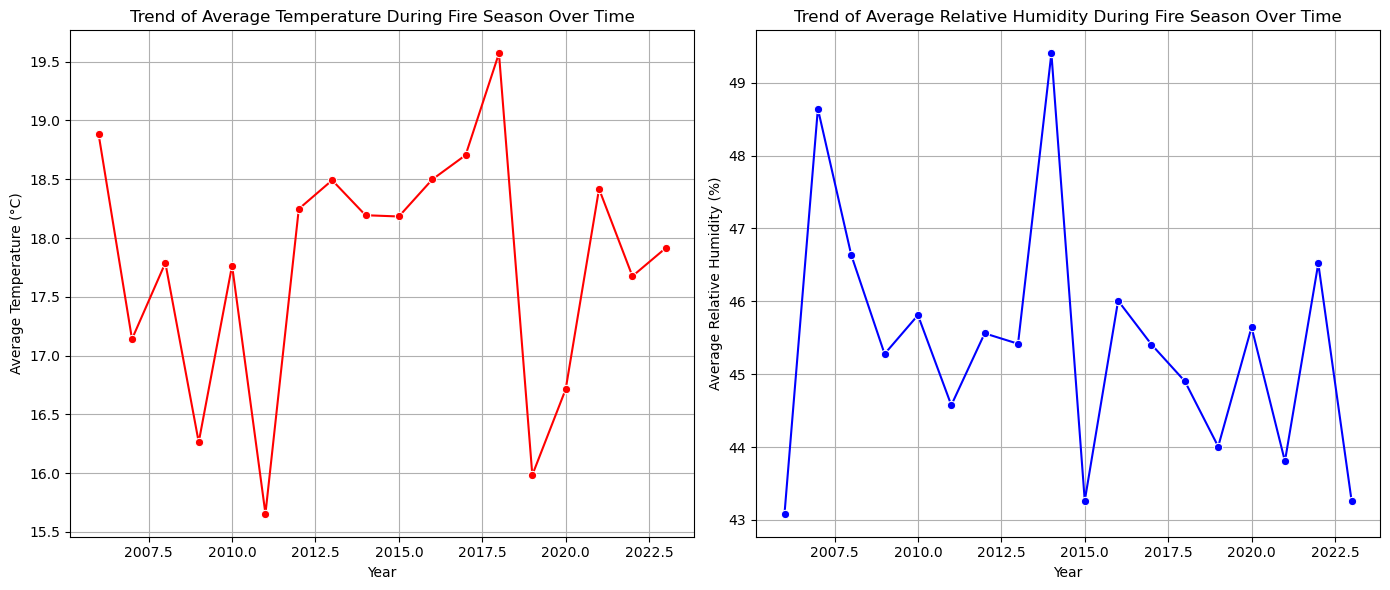

In [56]:
# grouping the data by year to calculate average temperature and humidity

temperature_trend = fireweath.groupby('fire_year')['temperature'].mean().reset_index() 

humidity_trend = fireweath.groupby('fire_year')['relative_humidity'].mean().reset_index() 


  
# setting the figure and axises 
plt.figure(figsize=(14, 6)) 


# attributes for the temperature trend plot 
plt.subplot(1, 2, 1) 

sns.lineplot(data=temperature_trend, x='fire_year', y='temperature', marker='o', color='r') 

plt.title('Trend of Average Temperature During Fire Season Over Time') 

plt.xlabel('Year') 

plt.ylabel('Average Temperature (°C)') 

plt.grid(True) 

  

# attributes for the humidity trend plot 
plt.subplot(1, 2, 2) 

sns.lineplot(data=humidity_trend, x='fire_year', y='relative_humidity', marker='o', color='b') 

plt.title('Trend of Average Relative Humidity During Fire Season Over Time') 

plt.xlabel('Year') 

plt.ylabel('Average Relative Humidity (%)') 

plt.grid(True) 

  

# displaying plots 
plt.tight_layout() 

plt.show() 

The analysis of average temperature and humidity data reveals important trends that may influence wildfire activity in Alberta. The data on temperature shows no discernible pattern over the years, however there is a noticeable strong increasing trend that started in 2011 and peaked in 2018 at about 20 degrees Celsius. Temperatures saw a steep decline after this high, although they have subsequently gradually risen. 

In contrast, the humidity data exhibits a more distinct trajectory. Initially, a sharp spike is observed at the start of the tracking in 2006, followed by a steady decline with occasional minor increases. A significant increase starts by 2011, reaching a peak of almost 50% in 2014. But after this high, there follows a sharp decline, reaching about 43% in 2015. Since then, the humidity has steadily risen and leveled out, typically remaining between 43% and 48%. 

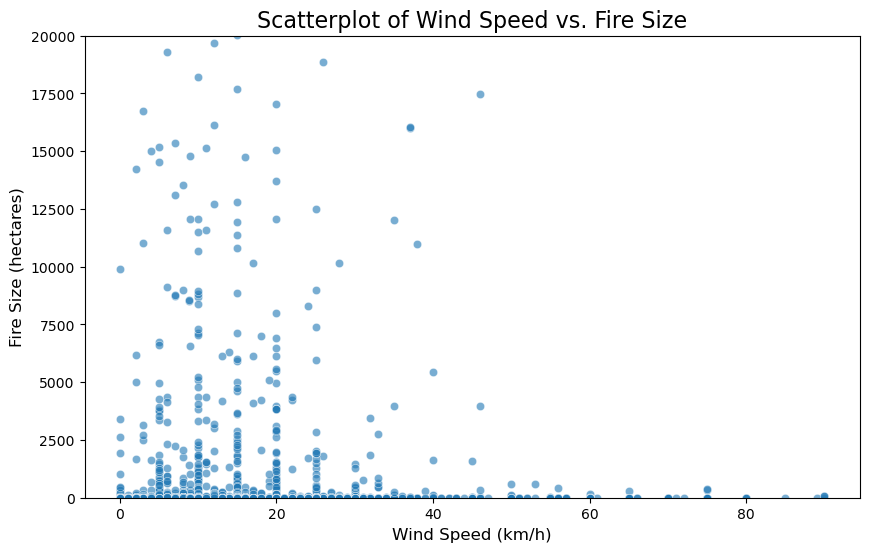

In [58]:
# creating scatterplot for Wind Speed vs. Fire Size 

plt.figure(figsize=(10, 6)) 

sns.scatterplot(x='wind_speed', y='current_size', data=fireweath, alpha=0.6) 

  

# set titles and labels 

plt.title('Scatterplot of Wind Speed vs. Fire Size', fontsize=16) 

plt.xlabel('Wind Speed (km/h)', fontsize=12) 

plt.ylabel('Fire Size (hectares)', fontsize=12) 

min_value = 0   

upper_value = 20000   

plt.ylim(min_value, upper_value) 

  

# displaying graph  
plt.show() 

/var/folders/hj/fynkjdg56sn38ggjqx8_34gm0000gn/T/ipykernel_64012/3856095041.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_group = fireweath.groupby('wind_speed_bins').agg(
/var/folders/hj/fynkjdg56sn38ggjqx8_34gm0000gn/T/ipykernel_64012/3856095041.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='wind_speed_bins', y='average_fire_size', data=wind_speed_group, palette='Blues_d', alpha=0.7)


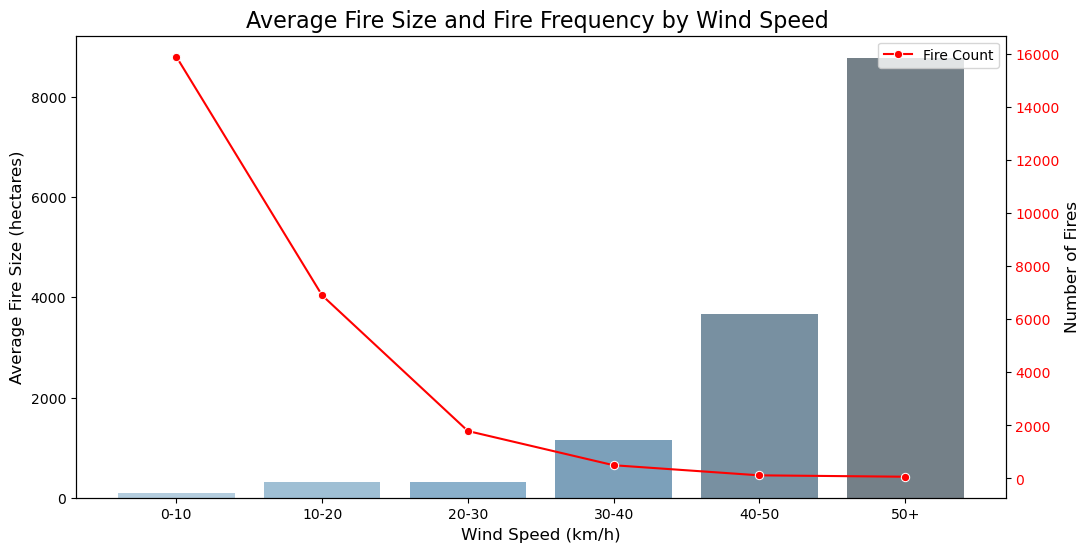

In [59]:
# visual for Average Fire Size and Fire Frequency by Wind Speed 

# wind speed bins 

bins = [0, 10, 20, 30, 40, 50, 60]   

labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+'] 

fireweath['wind_speed_bins'] = pd.cut(fireweath['wind_speed'], bins=bins, labels=labels, right=False) 

  

# grouping by wind speed bins to calculate average fire size and count of fires 

wind_speed_group = fireweath.groupby('wind_speed_bins').agg( 

    average_fire_size=('current_size', 'mean'), 

    fire_count=('current_size', 'count') 

).reset_index() 

# creating bar plot showing both average fire size and fire count 

plt.figure(figsize=(12, 6)) 

  

# creating bar plot for average fire size 

ax = sns.barplot(x='wind_speed_bins', y='average_fire_size', data=wind_speed_group, palette='Blues_d', alpha=0.7) 

  

# adding a secondary axis for fire count and creating line plot  

ax2 = ax.twinx() 

sns.lineplot(x='wind_speed_bins', y='fire_count', data=wind_speed_group, ax=ax2, color='red', marker='o', label='Fire Count', sort=False) 

  

# setting titles and labels 

plt.title('Average Fire Size and Fire Frequency by Wind Speed ', fontsize=16) 

ax.set_xlabel('Wind Speed (km/h)', fontsize=12)  # Use ax to set the x-label 

ax.set_ylabel('Average Fire Size (hectares)', fontsize=12)  # Use ax to set the y-label 

ax2.set_ylabel('Number of Fires', fontsize=12)  # Secondary y-axis label 

ax2.tick_params(axis='y', labelcolor='red') 

ax2.legend(loc='upper right') 

  

# displaying plot 

plt.show() 

The scatterplot illustrates a notable concentration of fire sizes occurring at lower wind speeds, particularly in the range of 0 to 40 km/h, with a heavy concentration of fires below 3,000 hectares. This trend indicates that wildfires can reach substantial sizes even under relatively mild wind conditions. 

However, when examining the average fire size relative to wind speed, we see that the 0-10 km/h wind speed group has the highest number of associated fires, totalling around 16,000, but these fires exhibit the lowest average size. As we analyze the data further, we observe fewer fires occurring at higher wind speeds (50 km/h and above), but those that do are, on average, significantly larger and more severe. The bar plot revealing average fire size by wind speed bins supports this, indicating that the highest average fire size is found in the 40-50 km/h wind speed range. 

This discrepancy between the scatterplot and the bar plot suggests a complex relationship: while a large number of fires may ignite at lower wind speeds, those that occur in the 40-50 km/h range tend to escalate dramatically in size. 

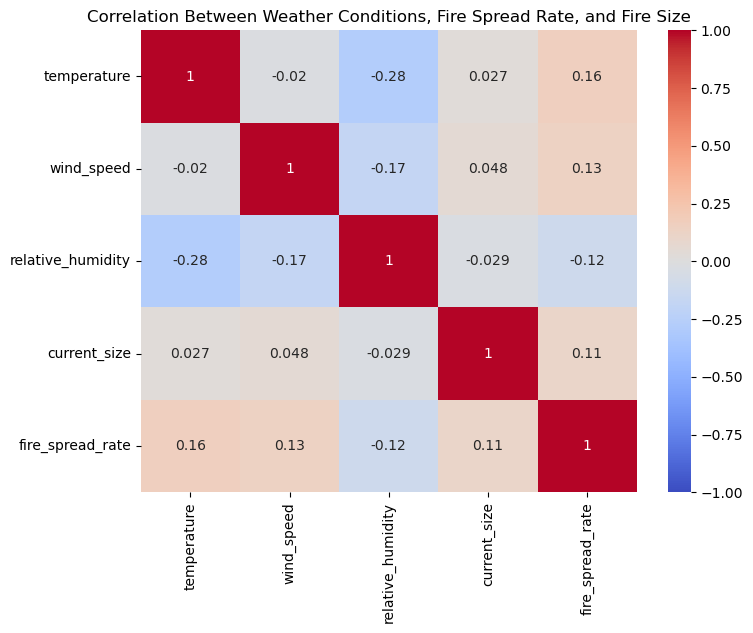

In [61]:
# Correlation Heat Map  

# isolating columns for correlation calculation 

corr_data = fireweath[['temperature', 'wind_speed', 'relative_humidity', 'current_size', 'fire_spread_rate']] 

  

# Compute the correlation matrix 

corr_matrix = corr_data.corr() 

  

# Plotting heatmap 

plt.figure(figsize=(8, 6)) 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 

plt.title('Correlation Between Weather Conditions, Fire Spread Rate, and Fire Size') 

plt.show() 

Looking at the correlation heatmap we have created, we see that there is a moderate positive correlation of 0.16 between fire spread rate and temperature, indicating that as temperatures rise, the rate of wildfire spread tends to increase. This suggests that as temperatures rise, the rate at which wildfires spread tends to increase as well. Higher temperatures can lead to drier vegetation and soils, reducing moisture levels and making the environment more conducive to fire spread. 

Similarly, the positive correlation of 0.13 between fire spread rate and wind speed highlights the critical role of wind in exacerbating fire conditions, as higher winds can carry embers and flames over greater distances, accelerating fire spread. 

In contrast, The negative correlation of -0.12 between relative humidity and fire spread rate suggests that as relative humidity increases, the rate of fire spread decreases. Higher humidity levels typically indicate more moisture in the environment, which can dampen fuels (i.e vegetation) and make it less likely for fires to ignite and spread quickly. 

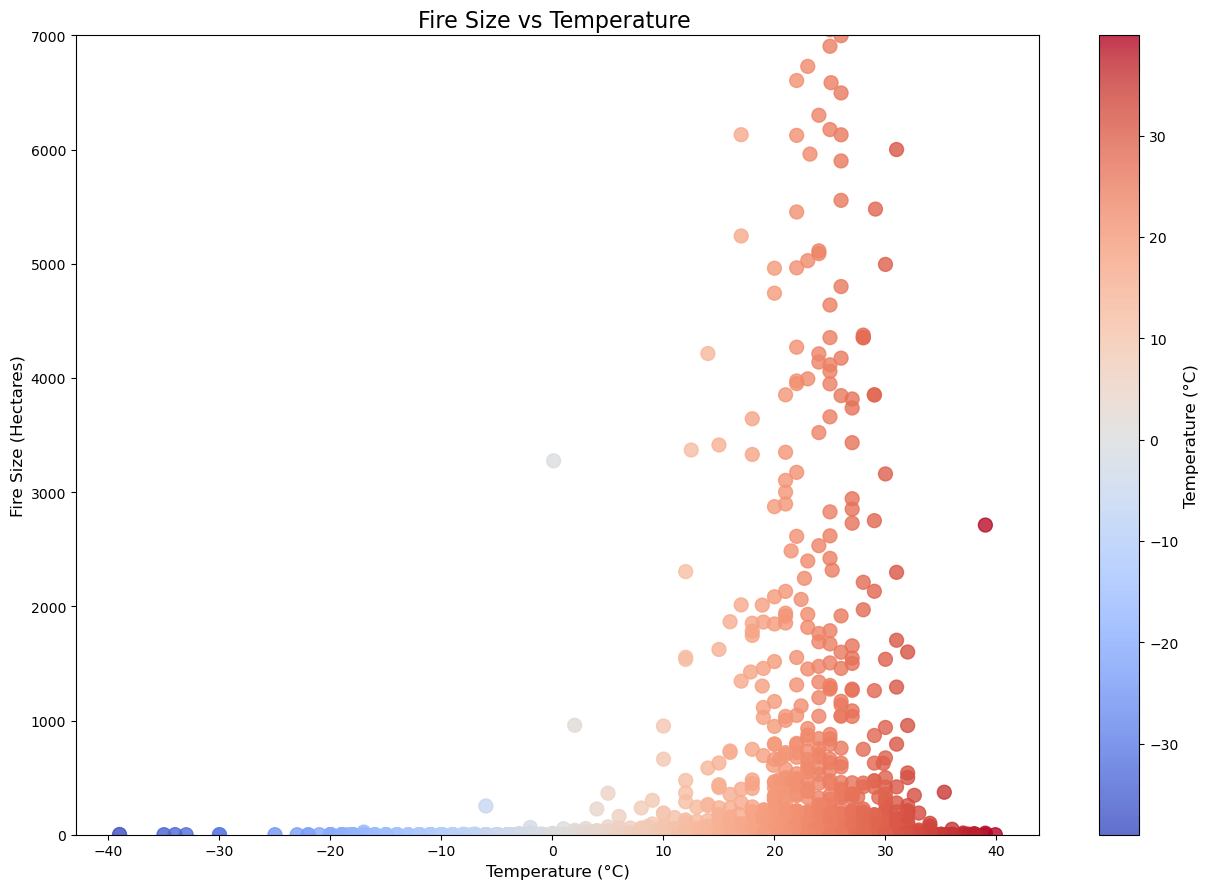

In [63]:
# creating graph scatter plot comparing temperature and fire size 

# creating scatter plot for fire size vs temperature 

plt.figure(figsize=(13, 9)) 

  

# plotting scatter with fire size as y-axis, temperature as x-axis, and color representing temperature 

scatter = plt.scatter(fireweath['temperature'], fireweath['current_size'], 

                      c=fireweath['temperature'], cmap='coolwarm', s=100, alpha=0.8) 

  

# adding color bar to represent the temperature 

cbar = plt.colorbar(scatter) 

cbar.set_label('Temperature (°C)', fontsize=12) 

  

# adding labels and title 

plt.xlabel('Temperature (°C)', fontsize=12) 

plt.ylabel('Fire Size (Hectares)', fontsize=12) 

plt.title('Fire Size vs Temperature ', fontsize=16) 

  

# scaling the y-axis  

min_value = 0   

upper_value = 7000   

plt.ylim(min_value, upper_value) 

  

# displaying the plot 

plt.tight_layout() 

plt.show() 

Looking at the scatterplot comparing temperature and fire size we see that there is a heavy concentration of data points at higher temperature ranges, particularly between 20°C to 40°C. This trend indicates that most wildfires occur during warmer conditions, suggesting that as temperatures rise, the likelihood and severity of fire occurrences also increase. While a few outliers exist at lower temperature ranges, suggesting that fires can still occur in cooler conditions, these instances are relatively uncommon compared to those in hotter environments. These outliers may represent specific situations where other factors, such as vegetation type, humidity levels, or ignition sources, played a more critical role in the intensity or size of the fire despite lower ambient temperatures. 

The observed correlation between temperature and fire size supports the hypothesis that higher temperatures lead to larger fires. This relationship aligns with existing literature, which posits that increased temperatures contribute to drier conditions, making vegetation more susceptible to ignition and allowing fires to spread more rapidly. As temperatures reach or surpass 30°C, there is a noticeable increase in fire size, indicating that conditions are becoming increasingly conducive to severe fire behaviour. This concentration of larger fires within the 20°C to 40°C range highlights a critical threshold for significant wildfire activity, underscoring the importance of monitoring fire risks during hotter periods. 

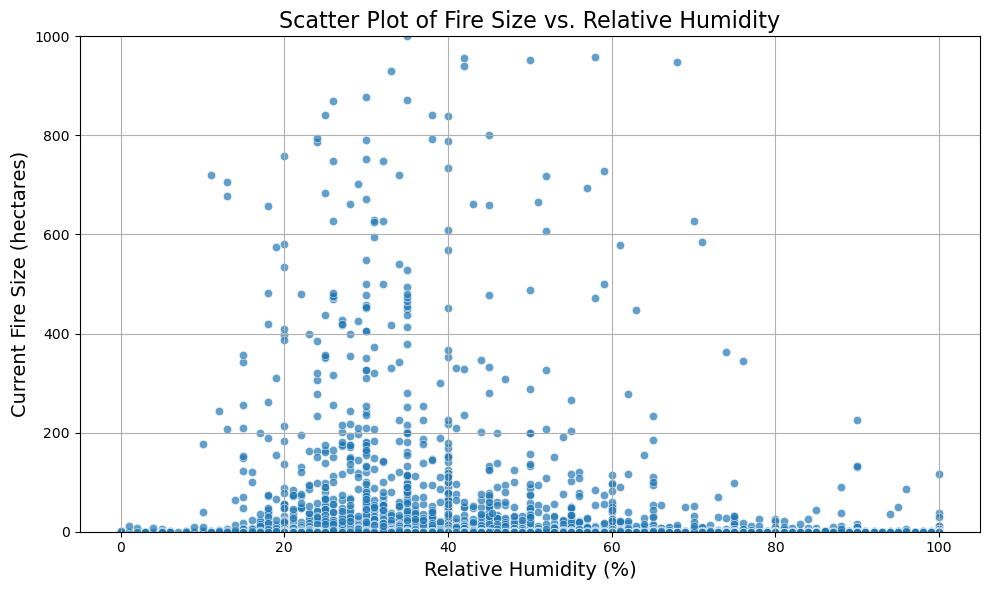

In [65]:
# scatterplot comparing fire size and relative humidity 

# setting figure size 

plt.figure(figsize=(10, 6)) 

  

# creating a scatter plot 

sns.scatterplot(data=fireweath, x='relative_humidity', y='current_size', alpha=0.7) 

  

# adding title and labels to visuals 

plt.title('Scatter Plot of Fire Size vs. Relative Humidity', fontsize=16) 

plt.xlabel('Relative Humidity (%)', fontsize=14) 

plt.ylabel('Current Fire Size (hectares)', fontsize=14) 

min_value = 0 

upper_value = 1000 

plt.ylim(min_value, upper_value) 

  

  

# displaying the plot 

plt.grid() 

plt.tight_layout() 

plt.show() 


    
The majority of the data points are concentrated within the 20% to 45% humidity range, where we observe a notable correlation with larger and more severe fires. This concentration suggests that moderate humidity levels create conditions conducive to substantial fire activity, allowing fires to grow in size and intensity. As humidity levels increase beyond this range, there is a marked decline in fire size, indicating that higher humidity may suppress fire spread and reduce the severity of wildfires. 

While instances of fires do occur at elevated humidity levels, these fires are typically much smaller in size. This phenomenon can be attributed to the moisture content in the air, which acts as a natural barrier against fire spread. High humidity levels often result in damp conditions, making it more challenging for fires to ignite and expand. Consequently, the scatter plot demonstrates that while fires can still ignite under high humidity conditions, their limited size underscores the role of environmental moisture in fire dynamics.

## Discussion: Weather Impacts on Fire (Rodney)

In conclusion, this analysis underscores the relationship between weather conditions and wildfire activity in Alberta. Higher temperatures and wind speeds, along with lower humidity levels, lead to an increased occurrence and severity of wildfires. This aligns with the understanding that wildfires are influenced by three main factors: hot, dry, and windy weather; the presence of flammable vegetation and debris; and numerous ignition sources. 

Wildfires are a common natural occurrence in Canada and play a large role in the ecology of forests, grasslands, and other ecosystems. Indigenous peoples have utilized cultural burning practices for millennia to maintain ecosystems and biodiversity. The findings of our analysis highlight how climate change is altering these dynamics, making it essential to consider not only weather conditions but also the changing landscape, vegetation types, and ignition sources as we assess wildfire risks. As the climate continues to evolve, it is important to monitor how fire-conducive weather conditions will change over time. The interplay of hotter temperatures, increased wind speeds, and drier conditions may lead to more frequent and severe wildfires in the future. 

## Guiding Question 3: Annual Number of Fires and Severity (Steen)

The guiding questions for this project section were:
    
 1. Has the annual number of forest fires increased from 2006 to 2023?
 2. Have these fires become larger or more severe over time?

In exploring these questions, I focused on tracking trends in the number of forest fires throughout the collection period for this dataset. As I worked on this analysis, I refined my approach to examine not only the frequency of fires but also the severity and size. This provided a deeper understanding of how these fire characteristics have evolved. 
        
## Analysis: Annual Number of Fires and Severity (Steen)

The analysis for this portion of the project included making heat maps, box plots, and bar graphs. 

In [68]:
df_fire_size_classes = pd.DataFrame({ 

    'Class Letter': ['A', 'B', 'C', 'D', 'E'], 

    'Minimum Size (ha)': [0, 0.1, 4.0, 40.0, 200], 

    'Maximum Size (ha)': [0.1, 4.0, 40.0, 200, float('inf')]}) 

display(df_fire_size_classes) 

,Class Letter,Minimum Size (ha),Maximum Size (ha)
0,A,0.0,0.1
1,B,0.1,4.0
2,C,4.0,40.0
3,D,40.0,200.0
4,E,200.0,inf


This represents a legend detailing each fire size class, along with its corresponding letter and the minimum and maximum size limits in hectares. 

In [70]:
 # choose the columns from the dataset 
fire = data_df[['fire_year', 'current_size', 'size_class']]

In [71]:
# Drop rows where 'fire_year' or 'size_class' are missing 

fire_cleaned = fire.dropna(subset=['fire_year', 'size_class']) # drop rows with missing values in these columns 

In [72]:
fire_cleaned['Fire_Count'] = 1  

In [73]:
 # year range 
years = list(range(2006, 2024))

# take every different entry for size_class; A, B, C, D, E 
size_classes = fire_cleaned['size_class'].unique()

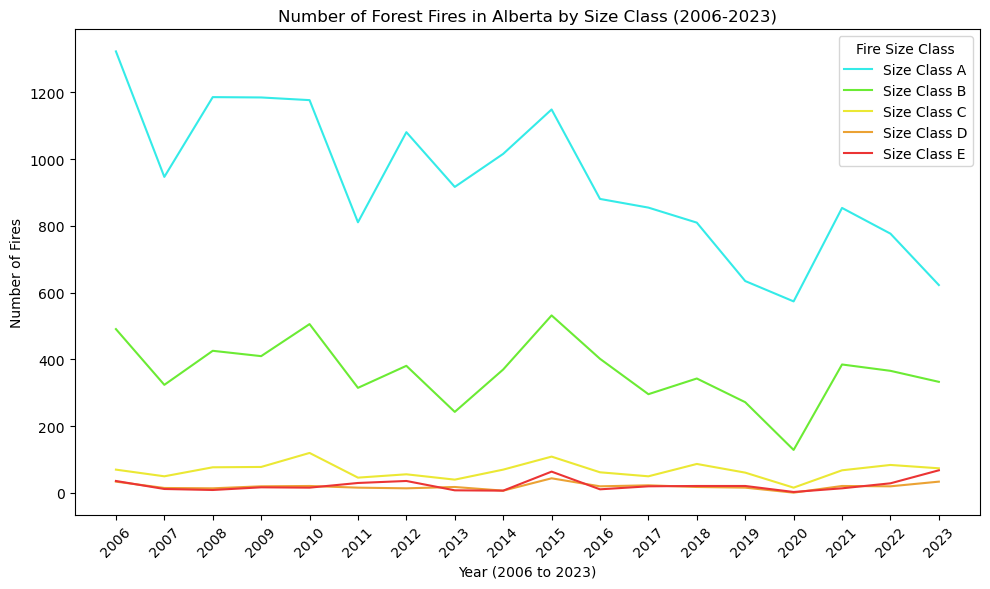

In [74]:
# Make a pivoted table
pivot_data = fire_cleaned.pivot_table(index='fire_year', columns='size_class', values='Fire_Count', aggfunc='sum').reindex(years, fill_value=0) 

  
#range of colours for class sizes. 
#From blue to red to show intensity. Hand picked from a 
#hexademical colour picker  
colours = ['#34ebe8', '#6beb34', '#ebe834', '#eba234', '#eb3434'] 

  
# plot data 
plt.figure(figsize=(10, 6)) 

# plot data. Use zip() to iterate through colours for the columns 
for size_class, color in zip(pivot_data.columns, colours): 

    plt.plot(pivot_data.index, pivot_data[size_class], label=f'Size Class {size_class}', color=color) 

  

plt.title('Number of Forest Fires in Alberta by Size Class (2006-2023)') 

plt.xlabel('Year (2006 to 2023)') 

plt.ylabel('Number of Fires') 

# rotate year labels 
plt.xticks(years, rotation=45) 

plt.legend(title='Fire Size Class') 

  

plt.tight_layout() 

plt.show() 

This frequency polygon shows a decrease in Class A fires (smallest) since 2006 and an increase in Class E fires (largest) from 2020 onwards, with 2023 surpassing 2015 as the worst year for large fires. The trend highlights that while the total number of fires has decreased, larger and more severe fires have become increasingly common, likely driven by environmental or human factors. By using a pivot table to collect the data and a colour gradient to show the different fire sizes, the plot illustrates that smaller fires have decreased meaning that fire severity has intensified over the years. 

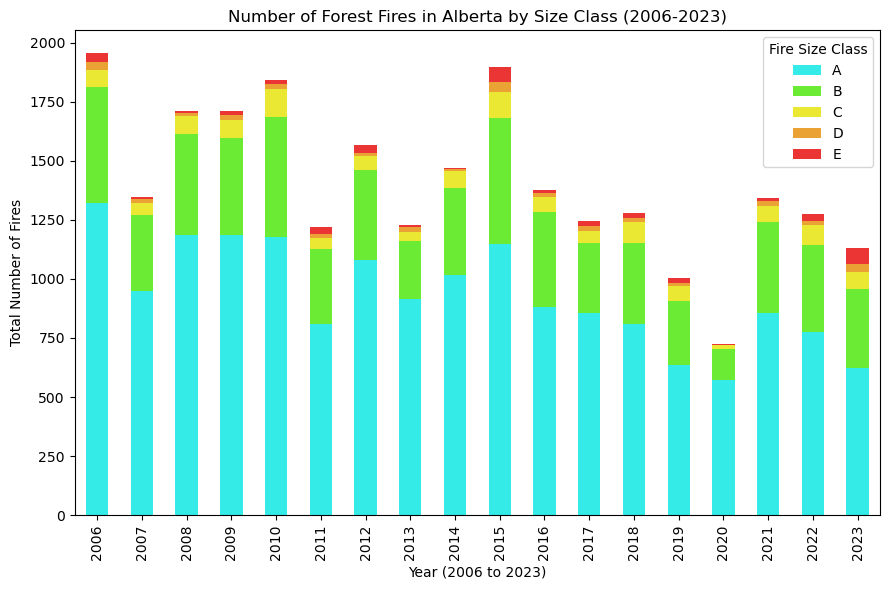

In [76]:
# range of colours for class sizes. From blue to red to show intensity 
colours = ['#34ebe8', '#6beb34', '#ebe834', '#eba234', '#eb3434'] 

# plot data in a stacked bar plot 
pivot_data.plot(kind='bar', stacked=True, figsize=(9, 6), color=colours) # plot data in a stacked bar plot 

plt.title('Number of Forest Fires in Alberta by Size Class (2006-2023)') 

plt.xlabel('Year (2006 to 2023)') 

plt.ylabel('Total Number of Fires') 

plt.legend(title='Fire Size Class') 

plt.tight_layout() 

plt.show() 

This is a stacked bar plot that shows the annual distribution of forest fires by size class from 2006 to 2023. The plot shows a slight overall decline in total fires, with notable spikes in 2006 and 2015, which were the worst years for wildfire activity, in regards to total fires. The plot also highlights a significant dip in 2020, with numbers being lowest in every fire class by far. This is likely influenced by reduced human activity during the COVID-19 pandemic. Despite a decrease in total fires in recent years, the plot indicates a growing number of larger fires, with Class E (largest) fires becoming increasingly prevalent. This trend suggests that while fire frequency may have declined, fire severity has intensified. Once again the data is represented by a colour gradient to show off the different fire size classes. 

In [78]:
fire_cleaned['Fire_Count'] = 1 

  
# Year range from 2006 to 2023  
years = list(range(2006, 2023+1)) 

# Fire size classes 
fire_classes = ['A', 'B', 'C', 'D', 'E']  

  

# make a pivot table, size_class as rows, fire_year as column. Count the number of fires 
pivot_data = fire_cleaned.pivot_table(index='size_class', columns='fire_year', values='Fire_Count', aggfunc='sum', fill_value=0)  

  

# make sure table includes all the years and fire class sizes  
pivot_data = pivot_data.reindex(index=fire_classes, columns=years, fill_value=0) # make sure table includes all the years and fire class sizes 

  

display(pivot_data) 

fire_year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
size_class,,,,,,,,,,,,,,,,,,
A,1323,947,1186,1185,1177,811,1081,917,1016,1149,881,855,810,635,574,854,777,623
B,491,324,426,410,506,315,381,243,370,532,402,296,343,272,129,385,366,333
C,70,50,77,78,120,46,56,40,70,109,62,50,87,61,16,68,84,74
D,34,15,14,20,21,16,14,18,7,44,20,23,18,16,1,21,20,34
E,36,12,9,17,16,30,36,8,7,64,11,20,21,21,3,14,29,68


Listed here is another visualization of the data, this time in the form of numerical data. The table shows each fire class and the total number of fires in each class for every year from 2006 to 2023. You can see for class A numbers from 2006 have been cut in half by 2023. On the other hand, class E fires nearly doubled any previous year except for 2015. 

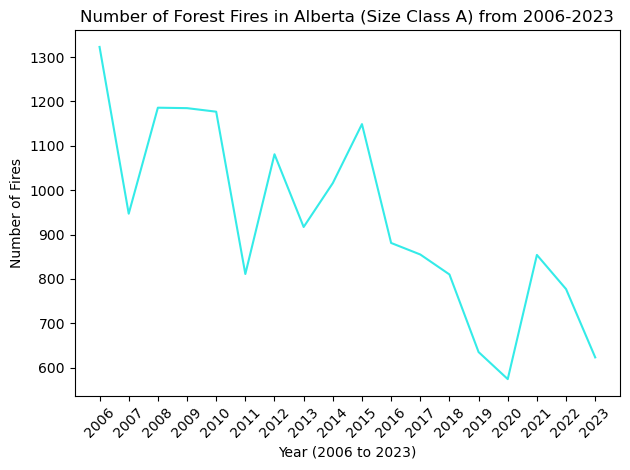

In [80]:

years = list(range(2006, 2024)) 

  
# make a pivot table, filter only for class A 
pivot_data = fire_cleaned.pivot_table(index='fire_year', columns='size_class', values='Fire_Count', aggfunc='sum').reindex(years, fill_value=0) 

  
# plot the class A polygon 
plt.plot(pivot_data.index, pivot_data['A'], label='Size Class A', color='#34ebe8') 

  

plt.title('Number of Forest Fires in Alberta (Size Class A) from 2006-2023') 

plt.xlabel('Year (2006 to 2023)') 

plt.ylabel('Number of Fires') 

  
# make sure every year is displayed 
plt.xticks(years, rotation=45) 

  

plt.tight_layout() 

plt.show() 

This plot provides a focused analysis of fire size Class A, the smallest fire category. The downward trend is clear, with the number of Class A fires nearly halving over the observed timeframe. It’s important to note that the vertical axis is scaled and does not start at zero, which accentuates the decline in small fires over the years. This visualization suggests a significant reduction in the occurrence of smaller fires, pointing to a shift towards fewer but potentially larger and more intense fires. 

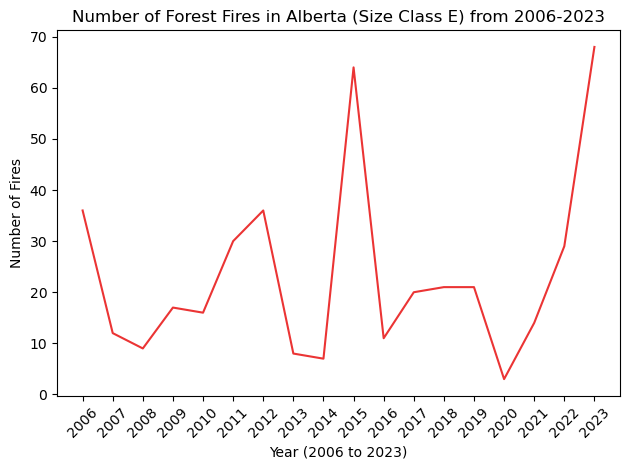

In [82]:
 # make a pivot table, filter only for class E 
pivot_data = fire_cleaned.pivot_table(index='fire_year', columns='size_class', values='Fire_Count', aggfunc='sum').reindex(years, fill_value=0)
  
# plot the class E polygon 
plt.plot(pivot_data.index, pivot_data['E'], label='Size Class E', color='#eb3434') # plot the class E polygon 

  

plt.title('Number of Forest Fires in Alberta (Size Class E) from 2006-2023') 

plt.xlabel('Year (2006 to 2023)') 

plt.ylabel('Number of Fires') 

  
# make sure every year is displayed
plt.xticks(years, rotation=45) # make sure every year is displayed 

  

plt.tight_layout() 

plt.show() 

On the other hand, this plot highlights size Class E, the largest fire category, and reveals a more steady trend overall. Class E has some notable outliers in 2015 and 2023. The data indicates an upward trend in Class E fires, particularly from 2020 onward, marking three years of growth not seen anywhere else in the timeline of 2006 to 2023. This suggests an increase in the frequency of the largest fires in recent years. It will be interesting to keep up with future years and see if 2024 continues to follow this trend 

In [84]:
# group by fire_year. Count number of fires each year 
fires_per_year = fire_cleaned.groupby('fire_year')['Fire_Count'].count() 

  
# make table out of the years and fires per year
fires_per_year_df = fires_per_year.reset_index()  

  
# add column names
fires_per_year_df.columns = ['Year', 'Number of Fires'] 

  

print(fires_per_year_df.to_string(index=False)) 

 Year  Number of Fires
 2006             1954
 2007             1348
 2008             1712
 2009             1710
 2010             1840
 2011             1218
 2012             1568
 2013             1226
 2014             1470
 2015             1898
 2016             1376
 2017             1244
 2018             1279
 2019             1005
 2020              723
 2021             1342
 2022             1276
 2023             1132


This table provides a final overview of the total number of fires recorded each year. Most notably, 2020 has the lowest count, being the only year with fewer than 1,000 fires. The next lowest year shows a significant difference of nearly 300 fires, highlighting 2020 as a major year in terms of reduced forest fire activity. 

## Discussion: Annual Number of Fires and Severity (Steen)

By addressing and exploring my guiding questions, my analysis revealed that while the total number of yearly fires has not increased, there has been a significant shift toward larger and more severe fires. In particular, the frequency polygon shows a steady decline in Class A fires since 2006. The plot also highlights that the number of Class E fires has been steadily increasing in recent years, with 2023 surpassing 2015 as the worst year for large fires on record. This shift in fire patterns and severity may be due to environmental or human factors. 

Adding on to this, the stacked bar plot illustrates these trends, showing a decline in total fire counts for each year, with the highest totals occurring from 2006-2015. The data for 2020 illustrate significantly fewer total fires which is likely due to decreased human activity and indoor isolation during the COVID-19 pandemic. Despite the downward trend in total fire frequency, fire severity has intensified, as seen by the colour gradient for the different fire size classes. 

The tabular data visualization further shows the breakdown of fire counts by size class each year. The trend indicates a shift to a higher frequency of larger fires, despite the total number of fires each year decreasing. 

After reflecting on the results of the analysis, this guiding question prompted a deeper insight into annual forest fire trends. Experimentation, combined with peer feedback, provided new perspectives on the data. Initially, I expected the number of fires to have increased, given recent media coverage and reports. It was surprising to see that the annual fire counts have declined, with nearly 900 fewer fires from 2006 to 2023. This observation suggests that the media may focus more on significant events that align with increased large fires in an attempt to raise awareness.

If I were to continue this project, I would explore whether the total annual area burned has increased. This is prompted by the discovery that there has been an increase in the number of large fires. It would be intriguing to analyze whether the total area affected is greater now than when the frequency of small fires was more prevalent. I find it interesting that most people think there are more fires nowadays even though the total numbers are decreasing. Another topic I would research moving forward would be looking at the history of fire regulations and data-capturing technology to see how fire prevalence has changed in response to shifting government policies.

## Guiding Question 4: Leading Causes of Fires (Bobbi)

***What are the five leading causes of forest fires in Alberta? Are more fires caused by nature or by human error?*** 

The only way we can attempt to reduce the amount of forest fires in Alberta is to know what is causing them. Once we are aware of what the cause is, we can then come up with action plans and emergency procedures that will help in reducing the amount of forest fires in the future. 

## Analysis: Leading Causes of Fires (Bobbi)

In [89]:
# create new data frame with columns needed for analysis 

df_causes = data_df[['fire_year','general_cause_desc','industry_identifier_desc','responsible_group_desc', 

                'activity_class','true_cause']] 

After looking through the data, I chose to focus on six columns, fire year, general causes, industry identifier, responsible group, activity class, and true causes. The first thing I did was create a new data frame with only the columns that were needed for my analysis. Then I checked for null values, finding general causes to have zero null values. This brought me to my first challenge, how to choose which column to best answer my guiding question. Before deciding on which column would be most useful for my analysis, I wanted to get a better picture of what the data looked like by creating exploratory data visualizations. By using the value.count() function, I was able to identify the number of fires for each cause within the general cause and true cause columns. With this information, I created two bar graphs, “General Causes of Forest Fires in Alberta” and “True Causes of Forest Fires in Alberta.” These graphs show the causes and number of fires from 2006-2023. What's interesting about these two graphs is that they both have different leading causes of fires, with lightning being the top general cause and unsafe fires being the top true cause. This conclusion is contradictory and therefore does not give us a definite answer to the guiding question. 

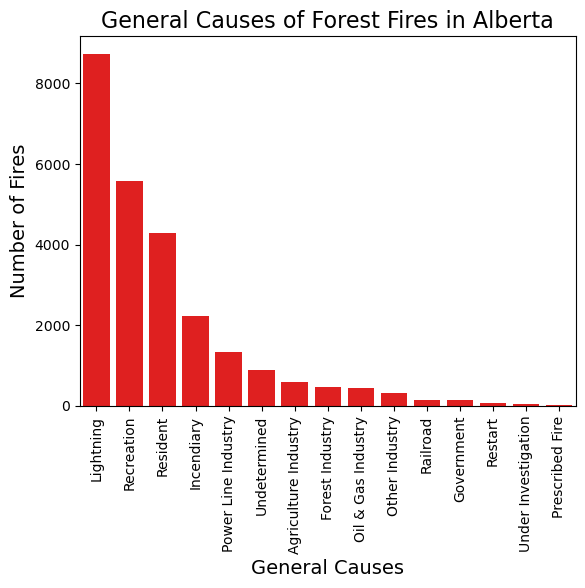

In [91]:
# count general causes 

gencause_count = df_causes['general_cause_desc'].value_counts() 

# reset the index 

df_gencause_count = gencause_count.reset_index() 

# create a bar plot and add titles and labels 

sns.barplot(x='general_cause_desc', y='count', data = df_gencause_count, color = 'red') 

plt.title('General Causes of Forest Fires in Alberta', fontsize=16) 

plt.xlabel('General Causes', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.xticks(rotation=90) 

plt.show() 

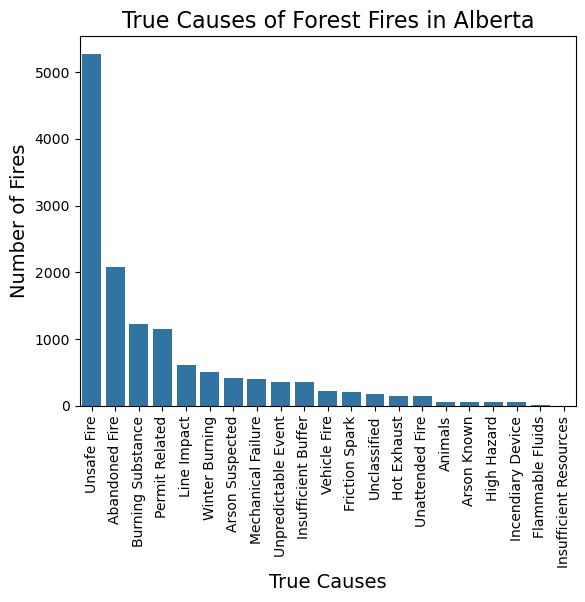

In [92]:
# count true causes 

truecause_count = df_causes['true_cause'].value_counts() 

# reset the index 

df_truecause_count = truecause_count.reset_index() 

# create a bar plot and add titles and labels 

sns.barplot(x='true_cause', y='count', data = df_truecause_count) 

plt.title('True Causes of Forest Fires in Alberta', fontsize=16) 

plt.xlabel('True Causes', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.xticks(rotation=90) 

plt.show() 

From there I moved on to look at the number of fires started by each cause per year. I created two line graphs, “General Causes of Forest Fires in Alberta per Year” and “True Causes of Forest Fires in Alberta per Year.” We will first take a look at “General Causes of Forest Fires in Alberta per Year.” We can see that lightning is once again the leading cause of fires every year except 2011, 2012, 2013, and 2020. This is followed by recreation which takes the lead in the years lightning is not the number one cause. Recreation is comprised of campers, hunters, hikers, etc. Now we will take a look at “True Causes of Forest Fires in Alberta per Year.” Here we can see a massive spike in unsafe fires in 2011. It is uncertain what caused this massive spike in 2011 but it makes sense in comparison to the previous graph. Many of the rows contain recreation as the general cause and unsafe fires as the true cause. Therefore, seeing the rise in recreation in 2011 in the “General Causes of Forest Fires in Alberta per Year” graph makes sense according to the massive spike in unsafe fires in 2011 in the “True Causes of Forest Fires in Alberta per Year” graph. Even with the correlation between the two graphs, the answer to the guiding question is still inconclusive. 

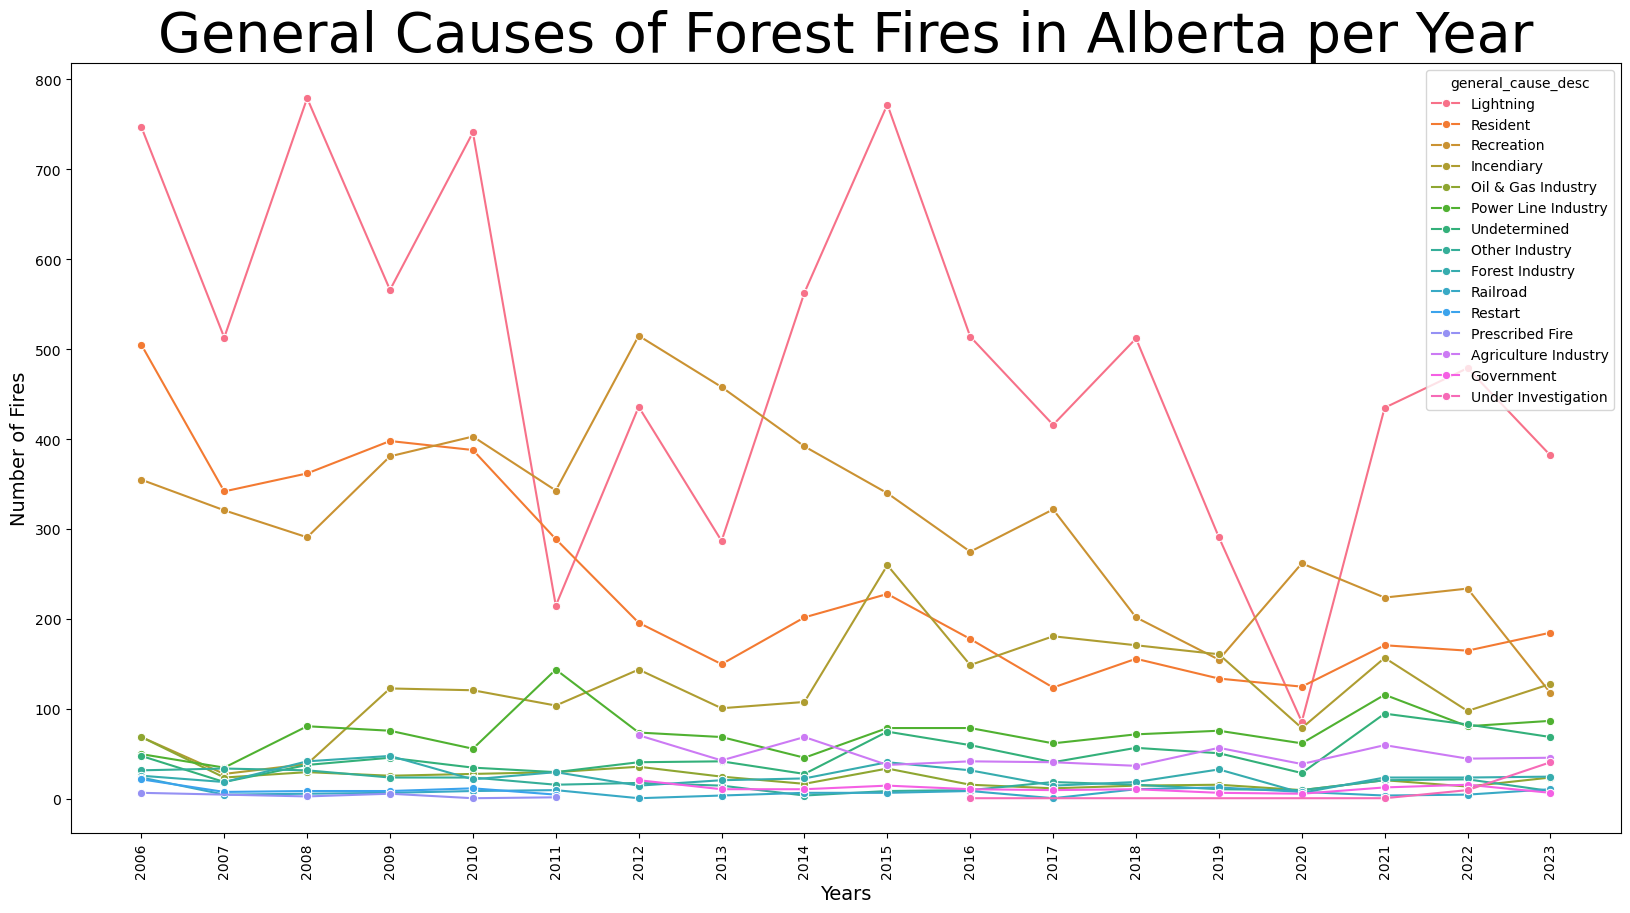

In [94]:
# count each value in general causes and organize by fire year 

gencause_count = df_causes.groupby('fire_year')['general_cause_desc'].value_counts() 

# reset the index 

df_gencause_per_year = gencause_count.reset_index() 

# create a line graph and add titles and labels 

plt.figure(figsize=(20,10)) 

sns.lineplot(data=df_gencause_per_year, x='fire_year', y='count', hue='general_cause_desc', marker='o') 

first_year = df_gencause_per_year.fire_year.min() 

last_year = df_gencause_per_year.fire_year.max() 

years = list(range(first_year, last_year+1)) 

plt.xticks(rotation=90,ticks=years) 

plt.title('General Causes of Forest Fires in Alberta per Year', fontsize=40) 

plt.xlabel('Years', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

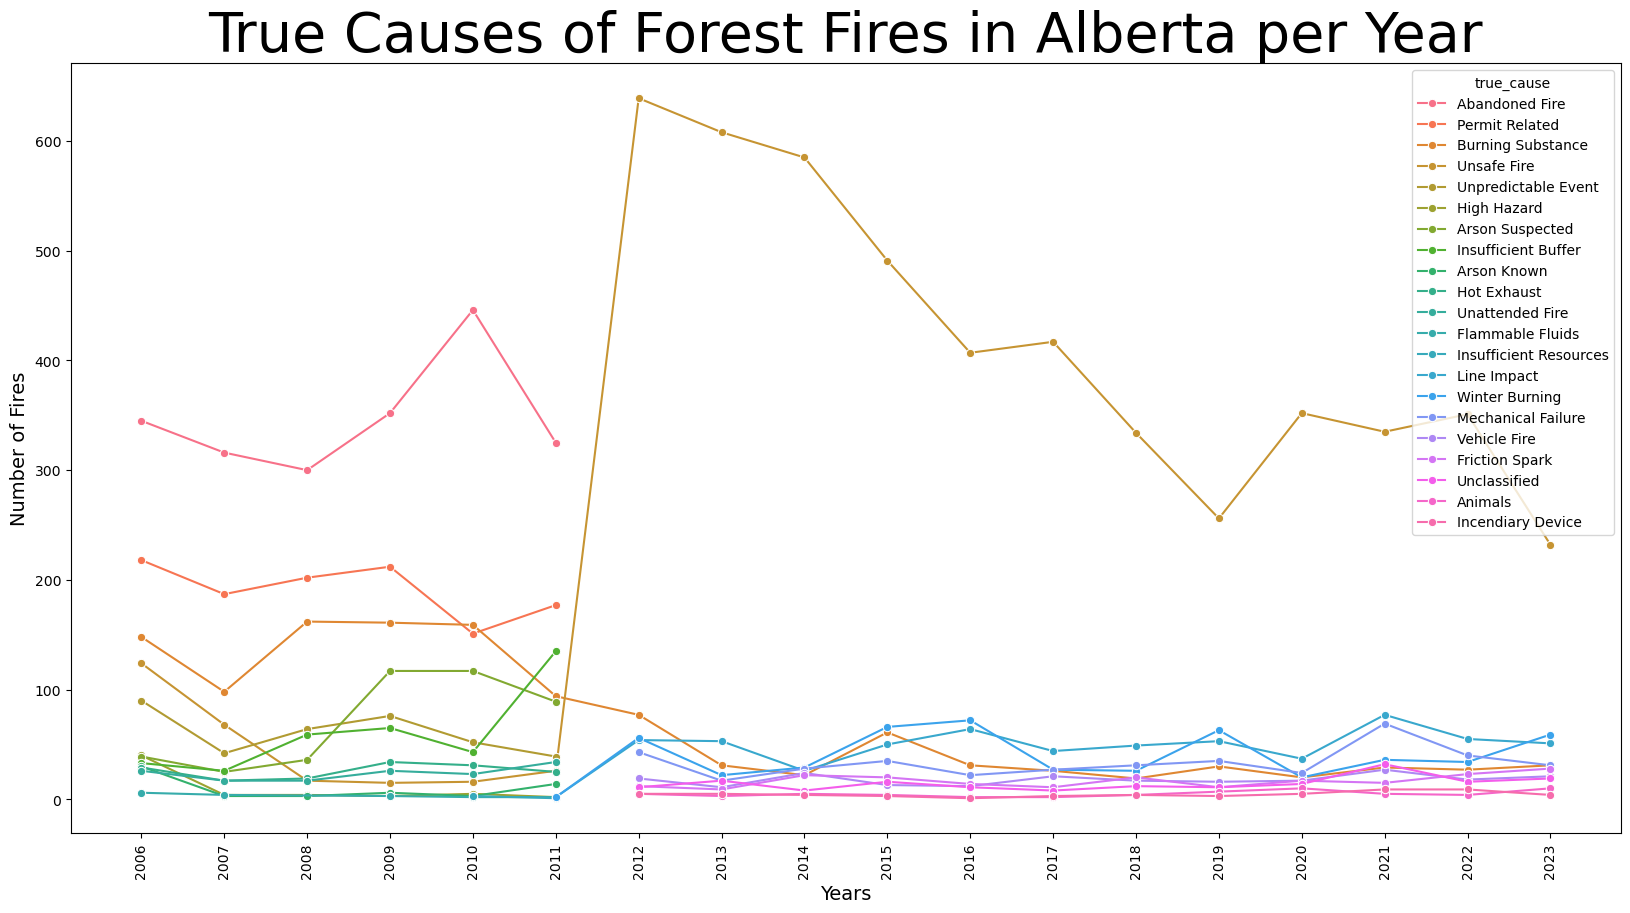

In [95]:
# count each value in true causes and organize by fire year 

truecause_count = df_causes.groupby('fire_year')['true_cause'].value_counts() 

# reset the index 

df_truecause_per_year = truecause_count.reset_index() 

# create a line graph and add titles and labels 

plt.figure(figsize=(20,10)) 

sns.lineplot(data=df_truecause_per_year, x='fire_year', y='count', hue='true_cause', marker='o') 

first_year = df_truecause_per_year.fire_year.min() 

last_year = df_truecause_per_year.fire_year.max() 

years = list(range(first_year, last_year+1)) 

plt.xticks(rotation=90,ticks=years) 

plt.title('True Causes of Forest Fires in Alberta per Year', fontsize=40) 

plt.xlabel('Years', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

Without any conclusive answers, I had to take a step back and reassess my data. I opened up the “Historical Wildfire Data Dictionary” and carefully read every definition for every column I had originally started with. From here, I organized the data into subsets that would provide the best information to my guiding question. I decided that being able to identify the industry causing the fire would be a great first step to understanding why these fires were caused and how to prevent them in the future. If the general cause column had “Other Industry,” I took the value from the industry identifier description column in order to obtain more useful information. I did the same thing for government, and expanded this information to find out which level of government was responsible for the fire. I also changed the general cause for any activity class pertaining to smoking, arson, OHV operation, and cooking and warming because these causes will provide more insight into why the fire was started. Lastly, I wanted to identify if the fire was caused by an animal tripping over or chewing on a powerline and so I took that information from the true causes column. After carefully cleaning and organizing my data-set, I renamed the general cause column to Forest Fire Cause. 

I restarted my analysis with a bar plot showing the causes and number of the fires from 2006-2023. We can see that the leading cause of forest fires in Alberta is lightning, followed by cooking and warming. This is more valuable information compared to the original discrepancy in leading causes. 

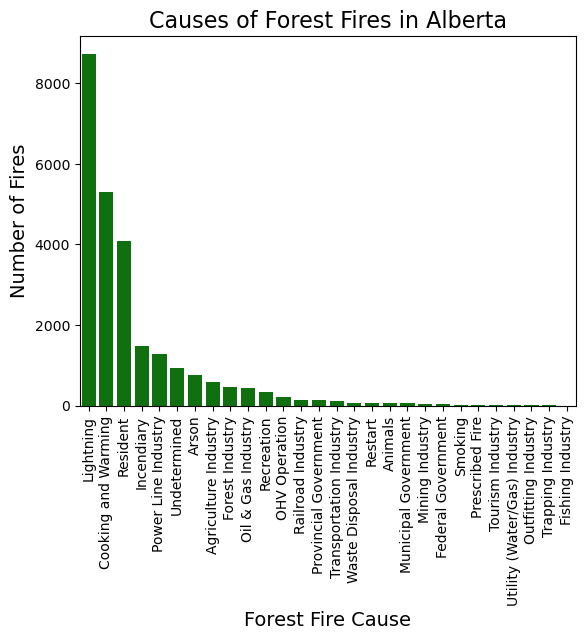

In [97]:
# take values from other columns and put them in place of the values in the general_cause_desc column 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['general_cause_desc'] != 'Other Industry', data_df['industry_identifier_desc']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['general_cause_desc'] != 'Government', data_df['industry_identifier_desc']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['true_cause'] != 'Animals', data_df['true_cause']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['activity_class'] != 'Smoking', data_df['activity_class']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['activity_class'] != 'Arson', data_df['activity_class']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['activity_class'] != 'OHV Operation', data_df['activity_class']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['activity_class'] != 'Cooking and Warming', data_df['activity_class']) 

data_df['general_cause_desc'] = data_df['general_cause_desc'].where(data_df['activity_class'] != 'Cooking', data_df['activity_class']) 

  

# rename the values in the general_cause_desc column for better accuracy and understanding 

data_df['general_cause_desc'] = data_df['general_cause_desc'].replace({'Cooking': 'Cooking and Warming','Mining': 'Mining Industry','Railroad':'Railroad Industry', 

                                                             'Comm. Tourism':'Tourism Industry', 'Comm. Fishery': 'Fishing Industry', 

                                                            'Waste Disposal':'Waste Disposal Industry','Commercial Outfitting':'Outfitting Industry', 

                                                            'Utility (Water/Gas)': 'Utility (Water/Gas) Industry','Comm. Transportation':'Transportation Industry', 

                                                            'Trapping':'Trapping Industry', 'Municipal': 'Municipal Government','Provincial': 'Provincial Government', 

                                                            'Federal': 'Federal Government', 'Under Investigation':'Undetermined'}) 

  

# rename the column as it no longer holds all general cause values 

data_df.rename(columns={'general_cause_desc': 'Forest_Fire_Cause'}, inplace=True) 

  

# count causes 

Forest_Fire_Cause_count = data_df['Forest_Fire_Cause'].value_counts() 

# reset index 

df_Forest_Fire_Cause_count = Forest_Fire_Cause_count.reset_index() 

  

# create a bar plot and add titles and labels 

sns.barplot(x='Forest_Fire_Cause', y='count', data = df_Forest_Fire_Cause_count, color = 'green') 

plt.title('Causes of Forest Fires in Alberta', fontsize=16) 

plt.xlabel('Forest Fire Cause', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.xticks(rotation=90) 

plt.show() 

To get a better idea of the fluctuations in causes of forest fires throughout the years, I created a line graph to showcase this trend. Similar to the graph “General Causes of Forest Fires in Alberta per Year,” we can see that lightning is the main cause of forest fires every year except 2011, 2012, 2013, and 2020. During these years, cooking and warming is the main cause of forest fires in Alberta. With so many variables, the graph becomes difficult to read. To remedy this, I took the top 5 causes in the “Causes of Forest Fires in Alberta” graph, and created one more line graph to better see how the number of causes fluctuate each year. 

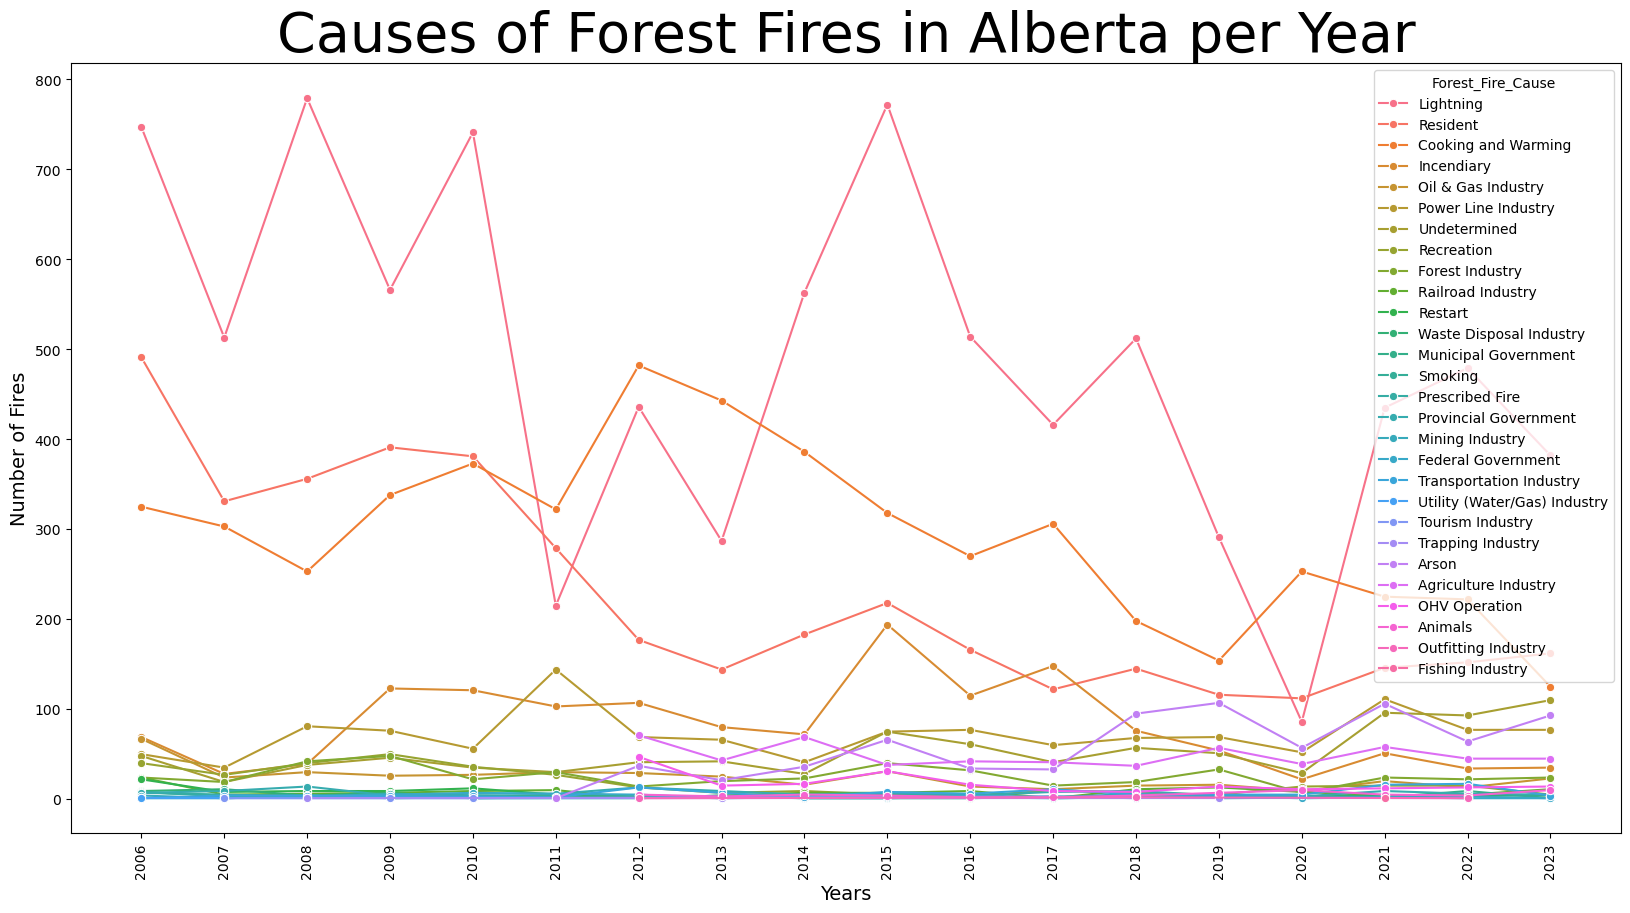

In [99]:
# count each value in forest fire causes and organize by fire year 

Forest_Fire_Cause_count = data_df.groupby('fire_year')['Forest_Fire_Cause'].value_counts() 

# reset the index 

df_Forest_Fire_Cause_per_year = Forest_Fire_Cause_count.reset_index() 

# create a line graph and add titles and labels 

plt.figure(figsize=(20,10)) 

sns.lineplot(data=df_Forest_Fire_Cause_per_year, x='fire_year', y='count', hue='Forest_Fire_Cause', marker='o') 

first_year = df_Forest_Fire_Cause_per_year.fire_year.min() 

last_year = df_Forest_Fire_Cause_per_year.fire_year.max() 

years = list(range(first_year, last_year+1)) 

plt.xticks(rotation=90,ticks=years) 

plt.title('Causes of Forest Fires in Alberta per Year', fontsize=40) 

plt.xlabel('Years', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

The graph below shows the top 5 causes of forest fires in Alberta throughout the years. We can see that lightning fluctuates a lot throughout the years. This could be attributed to climate change which could make for an interesting analysis in the future. In comparison, the Power Line Industry, being the fifth main cause of forest fires throughout the years, tends to stay fairly consistent throughout the years. 

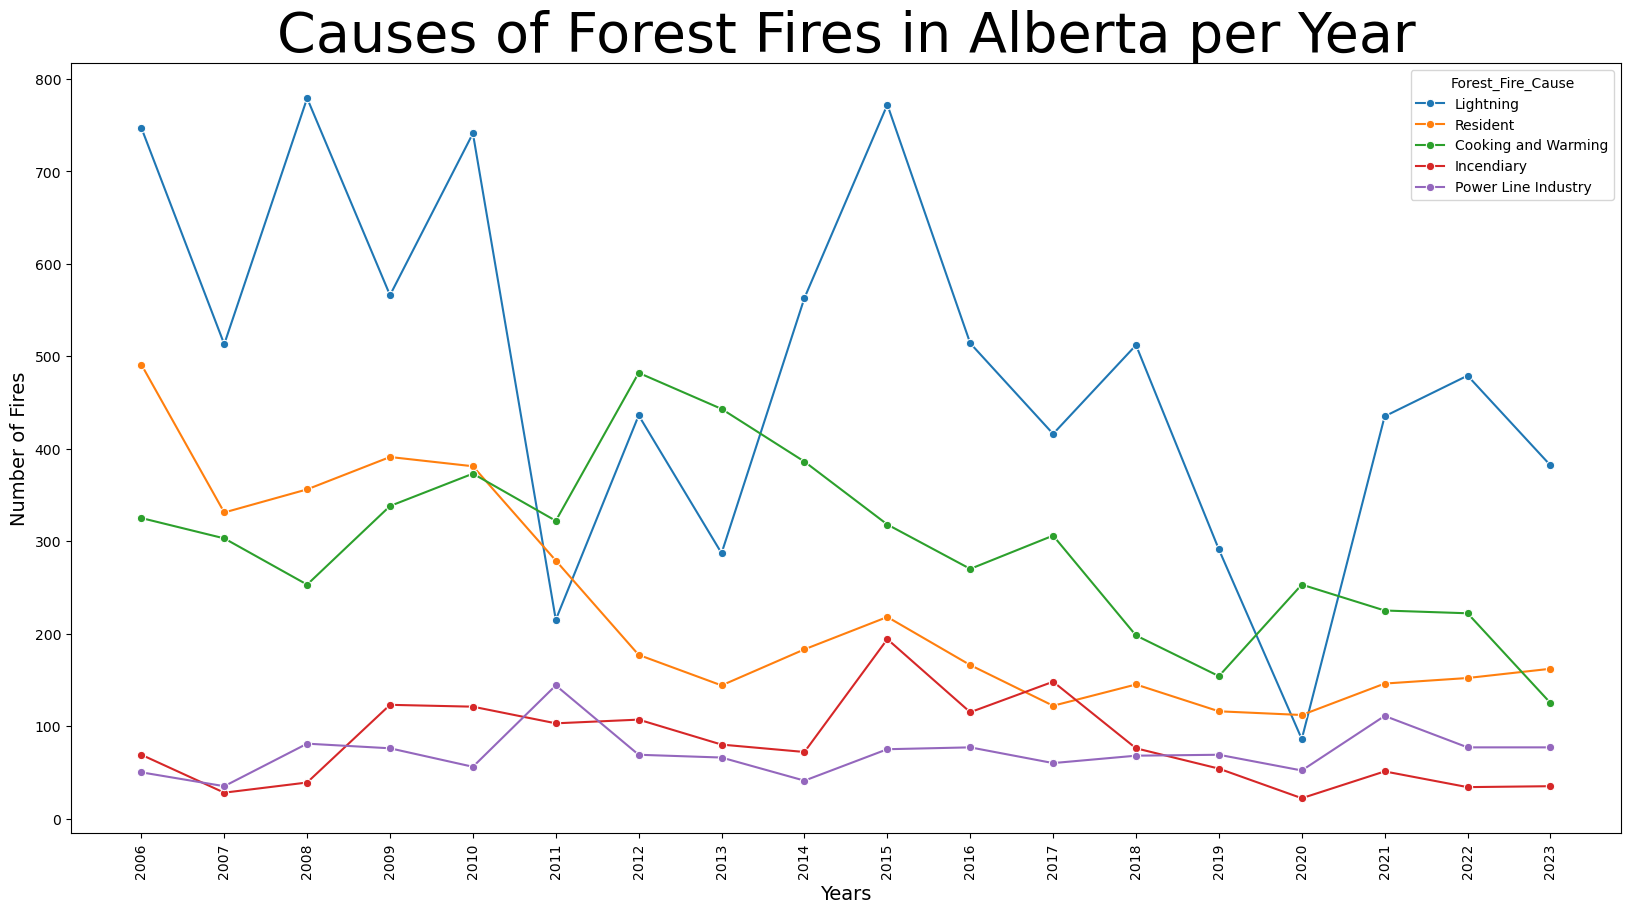

In [101]:
# top 5 causes 

top_5 = ['Lightning','Resident','Cooking and Warming','Incendiary','Power Line Industry'] 

# create a new data frame with the top 5 causes 

df_top_5 = df_Forest_Fire_Cause_per_year[df_Forest_Fire_Cause_per_year['Forest_Fire_Cause'].isin(top_5)] 

# create a line graph and add titles and labels 

plt.figure(figsize=(20,10)) 

sns.lineplot(data=df_top_5, x='fire_year', y='count', hue='Forest_Fire_Cause', marker='o') 

first_year = df_top_5.fire_year.min() 

last_year = df_top_5.fire_year.max() 

years = list(range(first_year, last_year+1)) 

plt.xticks(rotation=90,ticks=years) 

plt.title('Causes of Forest Fires in Alberta per Year', fontsize=40) 

plt.xlabel('Years', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

Now that I have come to a conclusion regarding the first half of my guiding question, I can focus on the second half which asks, “Are more fires caused by natural causes or human error?” To answer this question, I split the causes into two categories, natural cause and human cause. Within the data-set, the only natural cause is lightning. There are three causes that could not be properly placed into either of the categories and therefore have been removed from this part of the analysis. These causes include, undetermined, restart and animals. The “Historical Wildfire Data Dictionary” defines animals to be a “wildfire caused by an animal making contact with a power line.”  This definition leads me to believe that both nature and human error were involved for this fire to occur and therefore does not fit into either category. There is no definition for natural and human causes in the “Historical Wildfire Data Dictionary.” Therefore, I defined Human causes to be anything where humans interfered with the natural world, including but not limited to, abandoning fires at campsites or sparks caused by machinery. That leaves Natural causes to be anything caused by nature with no interference from humans or machinery, including lightning. Below is a bar graph that displays the number of forest fires caused by natural and human causes between 2006-2023. Based on the graph it is clear that Human interference is the is the main cause of forest fires in Alberta, almost doubling the number of forest fires caused by nature. This is an interesting conclusion seeing as we identified lighting to be the number one cause of forest fires in the graph “Causes of Forest Fires in Alberta.” 

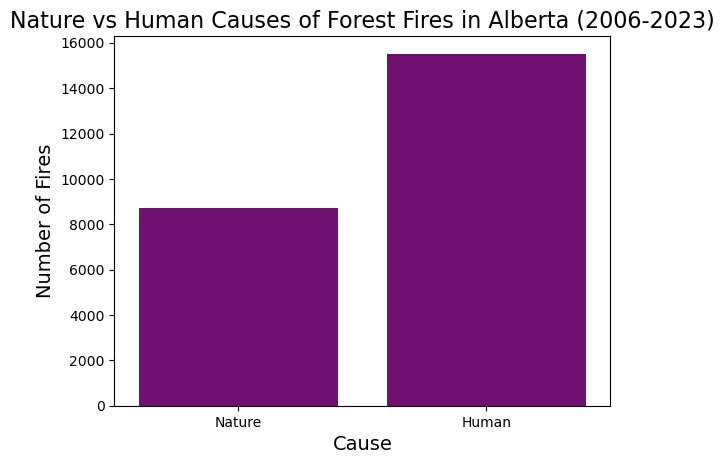

In [103]:
# human causes 

Human = ['Resident','Cooking and Warming','Incendiary','Power Line Industry','Oil & Gas Industry','Arson', 

         'Agriculture Industry','Forest Industry','Recreation','OHV Operation','Railroad Industry', 

         'Provincial Government','Transportation Industry','Waste Disposal Industry','Municipal Government', 

         'Mining Industry','Federal Government','Smoking','Prescribed Fire','Tourism Industry', 

         'Utility (Water/Gas) Industry','Outfitting Industry','Trapping Industry','Fishing Industry'] 

# create a new data frame of human causes 

df_Human = df_Forest_Fire_Cause_per_year[df_Forest_Fire_Cause_per_year['Forest_Fire_Cause'].isin(Human)] 

# sum human causes 

Human_count = df_Human['count'].sum() 

  

# nature causes 

Nature = ['Lightning'] 

# create a new data frame of human causes 

df_Nature = df_Forest_Fire_Cause_per_year[df_Forest_Fire_Cause_per_year['Forest_Fire_Cause'].isin(Nature)] 

# sum nature causes 

Nature_count = df_Nature['count'].sum() 

  

# create data frame combining nature and human causes 

nature_human = {'Cause':['Nature', 'Human'],'Count':[Nature_count, Human_count]} 

df_nature_human = pd.DataFrame(nature_human) 

  

# create a bar plot and add titles and labels 

sns.barplot(x='Cause', y='Count', data = df_nature_human, color = 'purple') 

plt.title('Nature vs Human Causes of Forest Fires in Alberta (2006-2023)', fontsize=16) 

plt.xlabel('Cause', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

The last visualization created is a line graph showing the fluctuations of natural and human causes throughout the years. This graph shows that humans have caused more fires than natural occurrences every year from 2006-2023. 

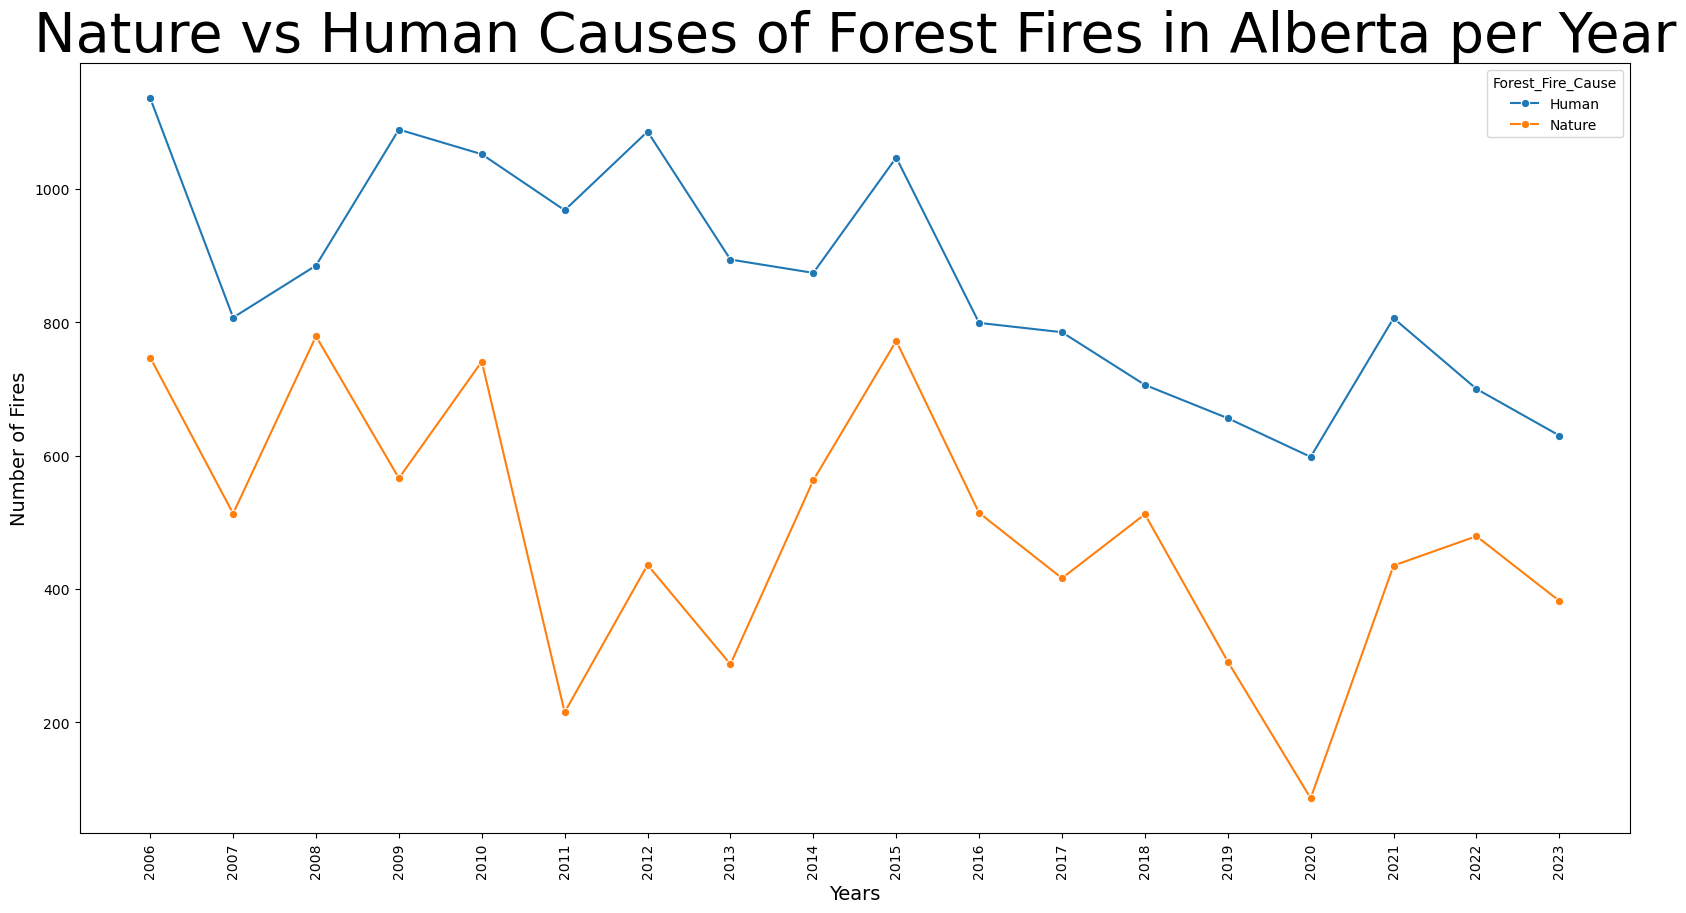

In [105]:
# rename the values in the Forest_Fire_Cause column human or nature 

data_df['Forest_Fire_Cause'] = data_df['Forest_Fire_Cause'].replace({'Resident':'Human','Cooking and Warming':'Human','Incendiary':'Human', 

                                                                         'Power Line Industry':'Human','Oil & Gas Industry':'Human','Arson':'Human', 

                                                                         'Agriculture Industry':'Human','Forest Industry':'Human','Recreation':'Human', 

                                                                         'OHV Operation':'Human','Railroad Industry':'Human','Provincial Government':'Human', 

                                                                         'Transportation Industry':'Human','Waste Disposal Industry':'Human','Municipal Government':'Human', 

                                                                         'Mining Industry':'Human','Federal Government':'Human','Smoking':'Human','Prescribed Fire':'Human', 

                                                                         'Tourism Industry':'Human','Utility (Water/Gas) Industry':'Human','Outfitting Industry':'Human', 

                                                                         'Trapping Industry':'Human','Fishing Industry':'Human','Lightning':'Nature'}) 

# nature and human causes 

nature_human = ['Nature','Human'] 

# create a new data frame of human causes 

df_nature_human = data_df[data_df['Forest_Fire_Cause'].isin(nature_human)] 

  

# count causes 

nature_vs_human = df_nature_human.groupby('fire_year')['Forest_Fire_Cause'].value_counts() 

# reset index 

df_nature_vs_human = nature_vs_human.reset_index() 

  

# create a bar plot and add titles and labels 

plt.figure(figsize=(20,10)) 

sns.lineplot(data=df_nature_vs_human, x='fire_year', y='count', hue='Forest_Fire_Cause', marker='o') 

first_year = df_nature_vs_human.fire_year.min() 

last_year = df_nature_vs_human.fire_year.max() 

years = list(range(first_year, last_year+1)) 

plt.xticks(rotation=90,ticks=years) 

plt.title('Nature vs Human Causes of Forest Fires in Alberta per Year', fontsize=40) 

plt.xlabel('Years', fontsize=14) 

plt.ylabel('Number of Fires', fontsize=14) 

plt.show() 

## Discussion: Leading Causes of Fires (Bobbi)

In conclusion, the five main causes of forest fires in Alberta from 2006-2023 are lightning, cooking and warming, resident, incendiary and the power line industry. Lighting is the main cause of forest fires with a total of 8734 fires between 2006-20023. When separating the data into natural or human causes, the results showed that humans cause more fires than natural occurrences. This information can be extremely useful in determining the next steps on how to reduce the amount of forest fires in the future. Policies can be put in place to help mitigate the number of fires started within different industries. Public education on how to safely enjoy the outdoors and properly put out campfires could help decrease the amount of forest fires caused by cooking and warming. Although there is no way to prevent lightning, the government could implement emergency response plans and ensure that there are enough resources to successfully put out the fire in a timely manner. This analysis, along with government intervention, could help reduce the amount of forest fires in the future. 

If I was to continue this analysis, I would be interested in analyzing the difference in size of the fire compared to what caused it. This would allow the government to be able to anticipate the amount of resources needed to fight fires based on how many fires are started by each cause and how big those fires tend to be. It could also be interesting to create a heat map showing where each fire was started by each cause and how big the fire was. 

## Final Conclusions
To conclude this project, we will look over some of the important insights we have discovered over the course of this analysis. The first major observation we will take a look at is in regard to fuel type and their impacts on fire spread, size and severity. Taking a look at the specifics we see that types M1, or boreal mixed wood leafless spruce trees, and O1b, standing grass, show results of slightly larger fires, as reflected by their higher median. Although M1 and O1b are less frequent than type C2 (boreal spruce), C2 has the highest variability and the most potential to start larger fires, indicated by the numerous outliers. Certain fuel types have the ability to thrive in diverse conditions; for instance, C2 adapts to varying water conditions well, impacting spread rate.  

 
The topic of insight we will look at next is weather conditions and the involvement they have in wildfire dynamics. Firstly, we will look at the impact wind speeds have on fires. The general trends show that the stronger the wind, the bigger the fire. With winds of around 40-50 km/h, fires have the capability to have a rapid growth rate. Wind, of course, is not the only factor when it comes to fire size and spread rate, and high rates still have the possibility of happening even with low wind speeds. Next, we will look at the temperature. Similarly to wind speeds, higher temperatures are correlated with increased spread rates, with the majority of climate temperatures during fires being in the range of 20-40℃. Conversely, higher humidity tends to result in a lower rate, while drier and more moderate levels of humidity tend to favour fire activity. 

 

Now we will look at the insights on total fires during the time period of 2006 to 2023. Some notable trends are as follows; the smallest fire size class, Class A, has shown a significant decrease since 2006 whereas Class E, the largest size, has been steadier but has been on an upward tick for the last three years. Despite the fact that total fires are surprisingly down in this timeframe, the trends for higher numbers in larger classes point to higher overall forest fire severity. This growth in severity and intensity as of recent may point to either environmental or human causes. As severity continues to rise, it is even more important to highlight the significance of changing fire dynamics and mitigation strategies. 

 

Lastly, we look at the results of the five main causes of fires in Alberta. While there are many different categories under ignition the most notable are lightning, cooking and warming, resident, incendiary, and the power line industry. There are two main categories, main cause and true cause. Lightning is the main cause of forest fires with there being nearly 9000 cases in the dataset. Although lightning is the biggest main cause for forest fire, overall, there are fewer natural causes than human causes; a result that can be seen with the reduced numbers in 2020 due to the COVID-19 pandemic. 

 

Throughout this project a number of clear trends have been uncovered, some anticipated and some unexpected. As time and awareness grow, these insights can hopefully help aid in forest fire mitigation and the efficiency of response teams. For now, we will just have to see if these trends continue. 

## References:

Alberta Wilderness Association. (2022, April 28). Boreal Forest - Alberta Wilderness Association. https://albertawilderness.ca/issues/wildlands/forests/boreal-forest/

Cheng, K. (2023, October 23). Future of wildfires: What will happen to Canada’s scorched forests as fires worsen? - National | Globalnews.ca. Retrieved from Global News website: https://globalnews.ca/news/10045754/canada-future-forest-wildfires/ 

Climate Atlas of Canada. (2016). Forest Fires and Climate Change | Climate Atlas of Canada. Retrieved from Climateatlas.ca website: https://climateatlas.ca/forest-fires-and-climate-change 

Forestry and Parks & Government of Alberta. (2024). Historical Wildfire Data Dictionary. https://open.alberta.ca/dataset/a221e7a0-4f46-4be7-9c5a-e29de9a3447e/resource/1b635b8b-a937-4be4-857e-8aeef77365d2/download/fp-historical-wildfire-data-dictionary-2006-2023.pdf 

GeeksforGeeks. (2024, July 11). Python: Pandas dataframe.to_string. https://www.geeksforgeeks.org/python-pandas-dataframe-to_string/ 

Historical wildfire data : 2006 to 2023 - Open Government, https://open.alberta.ca/opendata/wildfire-data 

Matplotlib.pyplot.xticks#. matplotlib.pyplot.xticks - Matplotlib 3.9.2 documentation. (n.d.). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 

Open government. (n.d.). https://open.alberta.ca/licence

Pandas.dataframe.reset_index#. pandas.DataFrame.reset_index - pandas 2.2.3 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html 

Pandas.pivot_table#. pandas.pivot_table - pandas 2.2.3 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html  

Understanding Fire Weather and Climate Change Basics  — ClimateData.ca. (2024, August 16). Retrieved from ClimateData.ca website: https://climatedata.ca/resource/understanding-fire-weather-and-climate-change-basics/ 

W3schools.com. W3Schools Online Web Tutorials. (n.d.-a). https://www.w3schools.com/python/pandas/ref_df_reindex.asp  

W3schools.com. W3Schools Online Web Tutorials. (n.d.-a). https://www.w3schools.com/python/matplotlib_plotting.asp  

W3schools.com. W3Schools Online Web Tutorials. (n.d.-a). https://www.w3schools.com/python/ref_func_zip.asp 

YouTube. (n.d.-a). YouTube. https://www.youtube.com/watch?app=desktop&v=kG6nhCinNus 